In [ ]:
pip install kmodes

In [1]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


In [229]:
faci = pickle.load(open('../data/facilities_wide.pkl', 'rb'))
faci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   hotel_name_                          307 non-null    object
 1   all_facilities                       307 non-null    object
 2   unlist                               307 non-null    object
 3   facilities_count                     307 non-null    int64 
 4   in_top_facilities                    307 non-null    object
 5   air conditioning                     307 non-null    int64 
 6   non-smoking rooms                    307 non-null    int64 
 7   fire extinguishers                   307 non-null    int64 
 8   cctv in common areas                 307 non-null    int64 
 9   private bathroom                     307 non-null    int64 
 10  smoke alarms                         307 non-null    int64 
 11  toilet                               307 non-

In [2]:
## load scraped hotel reviews data
test = pickle.load(open("../data/merged_hotel_data_withprice.pkl", "rb"))
test = test.reset_index(drop = True)
main_faci = pickle.load(open('../data/main_facilities_wide.pkl', 'rb'))
data = test.merge(main_faci, on = 'hotel_name_', how = 'left')
print(data.shape)
print(data.columns)
data.head()

(76536, 47)
Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict', 'hotel_surroundings',
       'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x',
       'price_list', 'cheapest_price', 'facilities_groups', 'all_facilities',
       'link', 'room_price_dict', 'name', 'room_type', 'nights_stayed',
       'month_stayed', 'occupant_type', 'from_country', 'review_score',
       'date_reviewed', 'short_review', 'positive_review', 'negative_review',
       'price', 'non smoking rooms', 'free wifi internet access included',
       'breakfast', 'room-service', 'free parking', '24 hour front desk',
       'restaurant', 'bar', 'airport shuttle', 'swimming pool', 'fitness room',
       'coffee/tea maker', 'family rooms', 'spa & wellness centre',
       'rooms/facilities for disabled'],
      dtype='object')


,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,24 hour front desk,restaurant,bar,airport shuttle,swimming pool,fitness room,coffee/tea maker,family rooms,spa & wellness centre,rooms/facilities for disabled
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,1,0,0
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,1,0,0
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,1,0,0
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,1,0,0
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,1,0,0


In [3]:
#insert customer #

customer_ind = range(0,len(data)) 
data['customer_ind'] = customer_ind



In [4]:
data.tail(5)

,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,restaurant,bar,airport shuttle,swimming pool,fitness room,coffee/tea maker,family rooms,spa & wellness centre,rooms/facilities for disabled,customer_ind
76531,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,76531
76532,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,76532
76533,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,76533
76534,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,76534
76535,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,76535


# FEATURE SELECTION

In [5]:
#define numerical variables
numerical = ['review_score','price']

In [6]:
#correct data type for numerical variables
df = data.astype({"review_score":"float"})
df = df.filter(['customer_ind','review_score','price','room_type','nights_stayed','occupant_type','from_country'])

In [7]:
#Define categorical variables
cat_var = ['room_type','nights_stayed','month_stayed','occupant_type','from_country',
'date_reviewed','nationality']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_ind   76536 non-null  int64  
 1   review_score   76536 non-null  float64
 2   price          57851 non-null  float64
 3   room_type      76536 non-null  object 
 4   nights_stayed  76536 non-null  object 
 5   occupant_type  76536 non-null  object 
 6   from_country   76536 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.7+ MB


In [9]:
for i in range(0,len(df)):
         nights = df['nights_stayed'][i][0]
         df['nights_stayed'][i] = nights

C:\Users\colee\AppData\Local\Temp\ipykernel_24032\2591831089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nights_stayed'][i] = nights


In [10]:
df['nights_stayed'][0][0]

'1'

In [11]:
df.head()

,customer_ind,review_score,price,room_type,nights_stayed,occupant_type,from_country
0,0,10.0,NaN,,1,Couple,Philippines
1,1,7.0,1590.0,Triple Room,2,Family,Philippines
2,2,5.0,NaN,,1,Couple,Philippines
3,3,6.0,977.0,Deluxe Room,6,Solo traveler,India
4,4,7.0,1590.0,Triple Room,1,Family,United Arab Emirates


In [12]:
df = df.astype({"nights_stayed":"int","customer_ind":"object"})

In [13]:
#create a column for nationality

def nationality(from_country):
    if from_country == "Philippines":
        return "Philippines"
    else:
        return "Foreigner"
    
df.loc[:, 'nationality'] = df['from_country'].apply(nationality)

In [14]:
## save to pickle file
pickle.dump(df, open('../data/merged_hotel_data_clustering_v2.pkl', "wb"))

In [15]:
df.head()

,customer_ind,review_score,price,room_type,nights_stayed,occupant_type,from_country,nationality
0,0,10.0,NaN,,1,Couple,Philippines,Philippines
1,1,7.0,1590.0,Triple Room,2,Family,Philippines,Philippines
2,2,5.0,NaN,,1,Couple,Philippines,Philippines
3,3,6.0,977.0,Deluxe Room,6,Solo traveler,India,Foreigner
4,4,7.0,1590.0,Triple Room,1,Family,United Arab Emirates,Foreigner


# CLUSTERING

K-Prototypes is a lesser known sibling but offers an advantage of workign with mixed data types. It measures distance between numerical features using Euclidean distance (like K-means) but also measure the distance between categorical features using the number of matching categories. It was first published by Huang (1998).

Source: https://antonsruberts.github.io/kproto-audience/?fbclid=IwAR0MmhDGZrXseBPpV1p9JECvomHZ2F9jEVpwKJgCr0ikRrxhbx2Fdu1zmaI

In [16]:
data2 = df.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_ind   57851 non-null  object 
 1   review_score   57851 non-null  float64
 2   price          57851 non-null  float64
 3   room_type      57851 non-null  object 
 4   nights_stayed  57851 non-null  int32  
 5   occupant_type  57851 non-null  object 
 6   from_country   57851 non-null  object 
 7   nationality    57851 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 3.8+ MB


In [17]:
data2['from_country'].unique()

array(['Philippines', 'India', 'United Arab Emirates', 'Australia',
       'Saudi Arabia', 'Canada', 'United Kingdom', 'China',
       'United States of America', 'Vietnam', 'Kuwait', 'New Zealand',
       'Papua New Guinea', 'Czech Republic', 'Malaysia', 'Ukraine',
       'Netherlands', 'Japan', 'Indonesia', 'Belgium', 'Thailand',
       'Norway', 'Poland', 'Laos', 'Ireland', 'France', 'Spain',
       'South Korea', 'Italy', 'Germany', 'Slovenia', 'Turkey',
       'Sri Lanka', 'Austria', 'Slovakia', 'Taiwan', 'Cook Islands',
       'Abkhazia, \u200bGeorgia', 'Russia', 'Hong Kong', 'Kenya', 'Egypt',
       'Qatar', 'Cambodia', 'Venezuela', 'Oman', 'Singapore',
       'Micronesia', 'Cyprus', 'Switzerland', 'Denmark', 'Iraq',
       'Romania', 'Bahrain', 'Israel', 'Lithuania', 'Sweden', 'Hungary',
       'Brazil', 'Lebanon', 'Croatia', 'Finland', 'Malta', 'Jordan',
       'Macau', 'Estonia', 'South Africa', 'Portugal', 'Kazakhstan', '',
       'Palestinian Territory', 'Greece', 'Bulgaria

In [18]:
data2['nationality'].value_counts()

Foreigner      31387
Philippines    26464
Name: nationality, dtype: int64

In [75]:
data2['occupant_type'].unique()

array(['Family', 'Solo traveler', 'Group', 'Couple'], dtype=object)

In [76]:
data2_group = data2.filter(['price','room_type','occupant_type'])
data2_group = data2_group.groupby(['room_type','occupant_type']).agg(pd.Series.mode)
data2_group


price
room_type                  occupant_type        
2 Queen Beds Room          Couple         3137.0
                           Family         3137.0
                           Group          3137.0
                           Solo traveler  3137.0
4-Bed Mixed Dormitory Room Couple          844.0
...                                          ...
Villa                      Solo traveler  3166.0
saver double               Couple         1276.0
                           Family         1276.0
                           Group          1276.0
                           Solo traveler  1276.0

[902 rows x 1 columns]

In [77]:
data2_group.to_csv("room_type.csv")

[Text(0.5, 1.0, 'distribution of price by occupant type')]

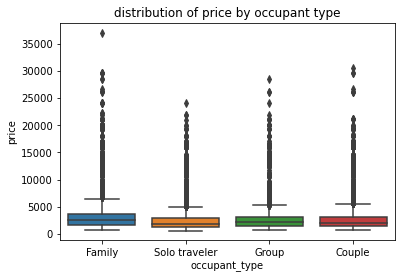

In [20]:
ax = sns.boxplot(data = data2, x = 'occupant_type', y = 'price')
ax.set(title = 'distribution of price by occupant type')

[Text(0.5, 1.0, 'distribution of price by nationality')]

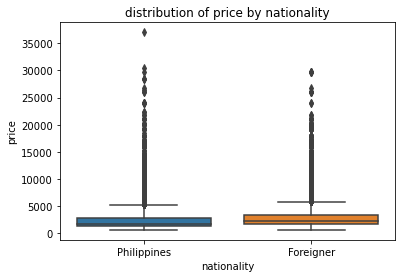

In [21]:
ax = sns.boxplot(data = data2, x = 'nationality', y = 'price')
ax.set(title = 'distribution of price by nationality')

[Text(0.5, 1.0, 'distribution of review score by nationality')]

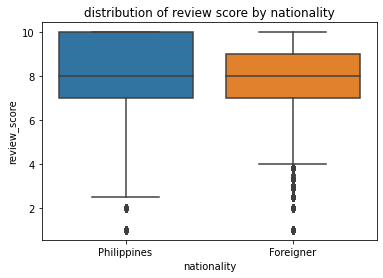

In [22]:
ax = sns.boxplot(data = data2, x = 'nationality', y = 'review_score')
ax.set(title = 'distribution of review score by nationality')

CLUSTER SET 1
Features:
1. review_score
2. price
3. room_type (removed due to variability per hotel)
4. nights_stayed
5. occupant_type
6. nationality

In [23]:
# Filter data
cluster_data = data2.copy()
cluster_data = data2.filter(['customer_ind','review_score','price','nights_stayed','occupant_type','nationality'])
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_ind   57851 non-null  object 
 1   review_score   57851 non-null  float64
 2   price          57851 non-null  float64
 3   nights_stayed  57851 non-null  int32  
 4   occupant_type  57851 non-null  object 
 5   nationality    57851 non-null  object 
dtypes: float64(2), int32(1), object(3)
memory usage: 2.9+ MB


In [24]:
# #Pre-processing for numerical variables
# from sklearn.preprocessing import StandardScaler

# for c in numerical:
#     scaler = StandardScaler()
#     cluster_data[c] = scaler.fit_transform(cluster_data[[c]])

In [25]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs=[]
n_clusters = []
clusters_assigned = []

for i in tqdm(range(1,11)):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(cluster_data, categorical=[0,4,5])
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
# fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
# fig.show()

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376691659192.0322
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376691659192.0322
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376691659192.0322
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376691659192.0322
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376691659192.0322
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376691659192.0322
Init: initializing centroids
Init: initializing clusters
Starting iterations..

 10%|████████▎                                                                          | 1/10 [01:29<13:21, 89.02s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1071, ncost: 127158027976.0241
Run: 1, iteration: 2/100, moves: 212, ncost: 127078312033.97269
Run: 1, iteration: 3/100, moves: 0, ncost: 127078312033.97269
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 21129, ncost: 174760552681.9635
Run: 2, iteration: 2/100, moves: 7730, ncost: 130132722714.60071
Run: 2, iteration: 3/100, moves: 1453, ncost: 127158027976.0241
Run: 2, iteration: 4/100, moves: 212, ncost: 127078312033.97269
Run: 2, iteration: 5/100, moves: 0, ncost: 127078312033.97269
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 28642, ncost: 207026435161.01022
Run: 3, iteration: 2/100, moves: 12423, ncost: 137443630385.68777
Run: 3, iteration: 3/100, moves: 2209, nco

 20%|████████████████▍                                                                 | 2/10 [06:40<29:20, 220.12s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4135, ncost: 74818673480.99959
Run: 1, iteration: 2/100, moves: 1887, ncost: 69998486862.44771
Run: 1, iteration: 3/100, moves: 618, ncost: 69871845008.72827
Run: 1, iteration: 4/100, moves: 94, ncost: 69868950108.66267
Run: 1, iteration: 5/100, moves: 0, ncost: 69868950108.66267
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 6381, ncost: 75694281428.62152
Run: 2, iteration: 2/100, moves: 1648, ncost: 69989867951.52922
Run: 2, iteration: 3/100, moves: 594, ncost: 69871845008.72827
Run: 2, iteration: 4/100, moves: 94, ncost: 69868950108.66267
Run: 2, iteration: 5/100, moves: 0, ncost: 69868950108.66267
Init: initializing centroids
Init: initializing clusters
Starting iterations...

 30%|████████████████████████▌                                                         | 3/10 [11:52<30:31, 261.69s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11755, ncost: 82181911416.20303
Run: 1, iteration: 2/100, moves: 7923, ncost: 70487501723.73148
Run: 1, iteration: 3/100, moves: 10325, ncost: 54198150540.73161
Run: 1, iteration: 4/100, moves: 9167, ncost: 45602159736.94324
Run: 1, iteration: 5/100, moves: 5262, ncost: 41905319396.81457
Run: 1, iteration: 6/100, moves: 3095, ncost: 39245518522.75539
Run: 1, iteration: 7/100, moves: 1318, ncost: 39118058972.601715
Run: 1, iteration: 8/100, moves: 194, ncost: 39114852668.620384
Run: 1, iteration: 9/100, moves: 84, ncost: 39114454314.20928
Run: 1, iteration: 10/100, moves: 0, ncost: 39114454314.20928
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 18564, ncost: 96277337156.29185
Run

 40%|████████████████████████████████▊                                                 | 4/10 [17:28<29:07, 291.21s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11739, ncost: 45437266703.59083
Run: 1, iteration: 2/100, moves: 4811, ncost: 37091834709.27498
Run: 1, iteration: 3/100, moves: 2689, ncost: 33655769529.098885
Run: 1, iteration: 4/100, moves: 502, ncost: 33582573290.569466
Run: 1, iteration: 5/100, moves: 70, ncost: 33581120221.28317
Run: 1, iteration: 6/100, moves: 0, ncost: 33581120221.28317
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 13817, ncost: 38402987570.575066
Run: 2, iteration: 2/100, moves: 7434, ncost: 31620544080.248837
Run: 2, iteration: 3/100, moves: 823, ncost: 31515460193.60724
Run: 2, iteration: 4/100, moves: 460, ncost: 31505977357.291164
Run: 2, iteration: 5/100, moves: 0, ncost: 31505977357.291164
Init: initializing centroids
Init: initializing clusters
Starti

 50%|█████████████████████████████████████████                                         | 5/10 [22:09<23:58, 287.61s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11931, ncost: 29682169829.416218
Run: 1, iteration: 2/100, moves: 3231, ncost: 29227770917.27315
Run: 1, iteration: 3/100, moves: 1211, ncost: 29137183622.2002
Run: 1, iteration: 4/100, moves: 1136, ncost: 28987862673.177208
Run: 1, iteration: 5/100, moves: 550, ncost: 28973523424.087444
Run: 1, iteration: 6/100, moves: 40, ncost: 28973453817.250904
Run: 1, iteration: 7/100, moves: 0, ncost: 28973453817.250904
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 18054, ncost: 41644239270.54618
Run: 2, iteration: 2/100, moves: 2897, ncost: 33603789645.76061
Run: 2, iteration: 3/100, moves: 2447, ncost: 30051167019.09336
Run: 2, iteration: 4/100, moves: 2190, ncost: 29554357662.703243
Run: 2, iteration: 5/100, moves: 1743, ncost: 29023197674.4

Run: 9, iteration: 5/100, moves: 7440, ncost: 35590935288.81722
Run: 9, iteration: 6/100, moves: 2378, ncost: 33309814047.786423
Run: 9, iteration: 7/100, moves: 3496, ncost: 33125570493.04129
Run: 9, iteration: 8/100, moves: 3278, ncost: 32942070546.180027
Run: 9, iteration: 9/100, moves: 1685, ncost: 32917448822.700684
Run: 9, iteration: 10/100, moves: 3310, ncost: 32712988873.23836
Run: 9, iteration: 11/100, moves: 6456, ncost: 32335578500.540688
Run: 9, iteration: 12/100, moves: 3603, ncost: 32195140265.729183
Run: 9, iteration: 13/100, moves: 6082, ncost: 30792369773.58039
Run: 9, iteration: 14/100, moves: 4684, ncost: 30079264190.603485
Run: 9, iteration: 15/100, moves: 1465, ncost: 29991069621.800922
Run: 9, iteration: 16/100, moves: 2321, ncost: 29566273358.061085
Run: 9, iteration: 17/100, moves: 2164, ncost: 29047306146.68881
Run: 9, iteration: 18/100, moves: 2958, ncost: 27125924273.1274
Run: 9, iteration: 19/100, moves: 942, ncost: 27024491243.0133
Run: 9, iteration: 20/100

 60%|█████████████████████████████████████████████████▏                                | 6/10 [30:30<24:00, 360.14s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8785, ncost: 31268194225.70736
Run: 1, iteration: 2/100, moves: 7892, ncost: 25263619852.8672
Run: 1, iteration: 3/100, moves: 4352, ncost: 24920718363.384323
Run: 1, iteration: 4/100, moves: 726, ncost: 24898523329.300156
Run: 1, iteration: 5/100, moves: 335, ncost: 24896672335.500378
Run: 1, iteration: 6/100, moves: 166, ncost: 24896293928.954666
Run: 1, iteration: 7/100, moves: 0, ncost: 24896293928.954666
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 13959, ncost: 29670929476.191936
Run: 2, iteration: 2/100

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [36:21<17:51, 357.24s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8204, ncost: 29653538148.829338
Run: 1, iteration: 2/100, moves: 4993, ncost: 24065188015.68937
Run: 1, iteration: 3/100, moves: 1599, ncost: 23861646956.265736
Run: 1, iteration: 4/100, moves: 1238, ncost: 23746107031.300945
Run: 1, iteration: 5/100, moves: 222, ncost: 23744843935.719666
Run: 1, iteration: 6/100, moves: 145, ncost: 23743879443.488285
Run: 1, iteration: 7/100, moves: 218, ncost: 23742966697.085587
Run: 1, iteration: 8/100, moves: 0, ncost: 23742966697.085587
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializin

Run: 10, iteration: 4/100, moves: 6489, ncost: 24009256396.118023
Run: 10, iteration: 5/100, moves: 1639, ncost: 23804572629.52882
Run: 10, iteration: 6/100, moves: 340, ncost: 23801292373.18623
Run: 10, iteration: 7/100, moves: 118, ncost: 23795618098.068348
Run: 10, iteration: 8/100, moves: 0, ncost: 23795618098.068348
Best run was number 1


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [42:58<12:19, 369.81s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 11912, ncost: 32575404699.1107
Run: 8, iteration: 2/100, moves: 6920, ncost: 26611113069.561546
Run: 8, iteration: 3/100, moves: 4966, ncost: 23696421913.547646
Run: 8, iteration: 4/100, moves: 1630, ncost: 23524613698.44709
Run: 8, iteration: 5/100, moves: 164, ncost: 23522319969.730873
Run: 8, iteration: 6/100, moves: 74, ncost: 23516697290.14063
Run: 8, iteration: 7/100, moves: 0, ncost: 23516697290.14063
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 14834, ncost: 25135189988.960823
Run: 9, iteration: 2/100, moves: 4726, ncost: 23165570133.682446
Run: 9, iteration: 3/100, moves: 1746, ncost: 23132657294.379524
Run: 9, iteration: 4/100, moves: 87, ncost: 23132569728.197906
Run: 9, iteration: 5/100, moves: 12, ncost: 2313256

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [50:39<06:38, 398.28s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11550, ncost: 30877085639.945084
Run: 1, iteration: 2/100, moves: 11921, ncost: 24211349126.369034
Run: 1, iteration: 3/100, moves: 6025, ncost: 23484098639.42042
Run: 1, iteration: 4/100, moves: 7286, ncost: 23013009749.499363
Run: 1, iteration: 5/100, moves: 4145, ncost: 22880354125.207863
Run: 1, iteration: 6/100, moves: 2613, ncost: 22781677749.228092
Run: 1, iteration: 7/100, moves: 3298, ncost: 22644097016.624146
Run: 1, iteration: 8/100, moves: 3109, ncost: 22546515406.54061
Run: 1, iteration: 9/100, moves: 686, ncost: 22542457496.576355
Run: 1, iteration: 10/100, moves: 100, ncost: 22542345831.873917
Run: 1, iteration: 11/100, moves: 1, ncost: 22542345815.85046
Run: 1, iteration: 12/100, moves: 0, ncost: 22542345815.85046
Init: initializing centroids
Init: initializing clusters
Init: initiali

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [56:41<00:00, 340.17s/it]


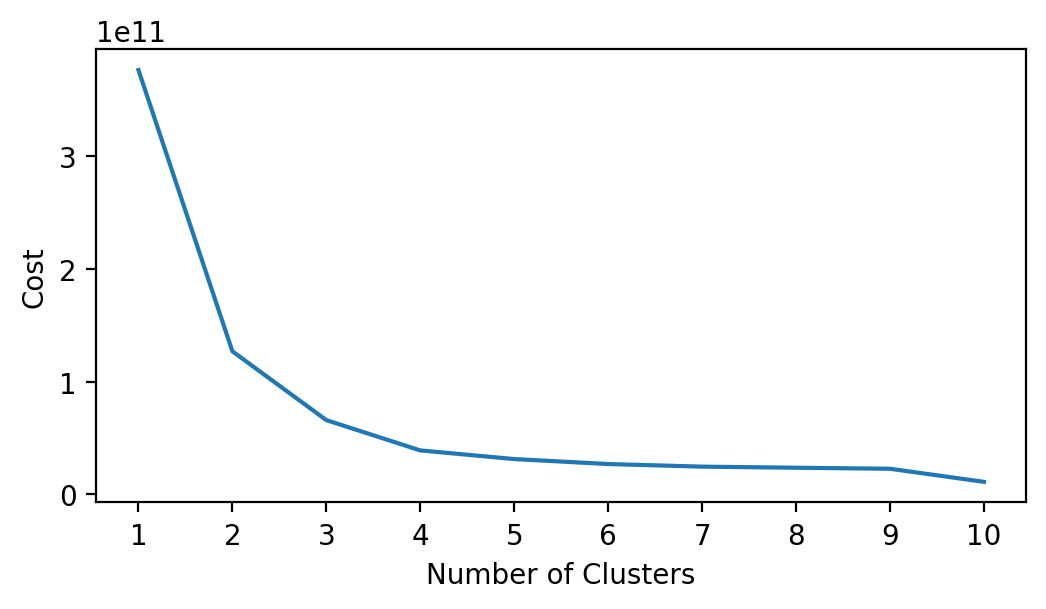

In [26]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), costs)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

# fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
# fig.show()

In [27]:
cluster_data['cluster1'] = clusters_assigned[0]
cluster_data['cluster2'] = clusters_assigned[1]
cluster_data['cluster3'] = clusters_assigned[2]
cluster_data['cluster4'] = clusters_assigned[3]
cluster_data['cluster5'] = clusters_assigned[4]
cluster_data['cluster6'] = clusters_assigned[5]
cluster_data['cluster7'] = clusters_assigned[6]
cluster_data['cluster8'] = clusters_assigned[7]
cluster_data['cluster9'] = clusters_assigned[8]
cluster_data['cluster10'] = clusters_assigned[9]
cluster_data

,customer_ind,review_score,price,nights_stayed,occupant_type,nationality,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
1,1,7.0,1590.0,2,Family,Philippines,0,0,0,0,3,1,5,5,0,7
3,3,6.0,977.0,6,Solo traveler,Foreigner,0,0,0,0,3,1,3,6,4,5
4,4,7.0,1590.0,1,Family,Foreigner,0,0,0,0,3,1,5,5,0,7
5,5,7.0,2308.0,5,Family,Philippines,0,0,0,0,1,4,5,5,8,9
7,7,7.0,2308.0,2,Family,Philippines,0,0,0,0,1,4,5,5,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76495,76495,1.0,2505.0,1,Couple,Foreigner,0,0,0,1,1,4,2,4,8,9
76510,76510,10.0,2912.0,1,Family,Foreigner,0,0,0,1,1,0,2,4,6,1
76511,76511,10.0,2651.0,1,Family,Philippines,0,0,0,1,1,0,2,4,6,1
76515,76515,10.0,2651.0,4,Group,Foreigner,0,0,0,1,1,0,2,4,6,1


In [28]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster4'])
cluster_data_group = cluster_data_group.groupby('cluster4').agg(pd.Series.mode)
cluster_data_group

,review_score,price,nights_stayed,occupant_type,nationality
cluster4,,,,,
0,10.0,1887.0,1,Solo traveler,Philippines
1,10.0,3055.0,1,Couple,Foreigner
2,10.0,10800.0,1,Family,Foreigner
3,10.0,6000.0,1,Family,Foreigner


[Text(0.5, 1.0, 'distribution of price by cluster')]

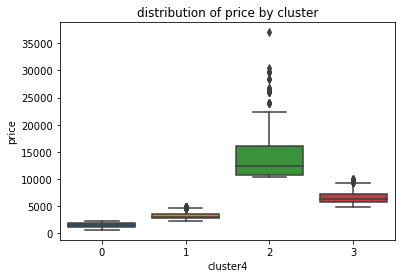

In [29]:
ax = sns.boxplot(data = cluster_data, x = 'cluster4', y = 'price')
ax.set(title = 'distribution of price by cluster')

[Text(0.5, 1.0, 'distribution of review score by cluster')]

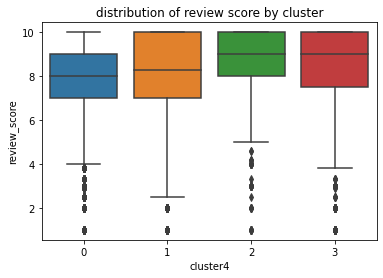

In [31]:
ax = sns.boxplot(data = cluster_data, x = 'cluster4', y = 'review_score')
ax.set(title = 'distribution of review score by cluster')

[Text(0.5, 1.0, 'distribution of nights stayed by cluster')]

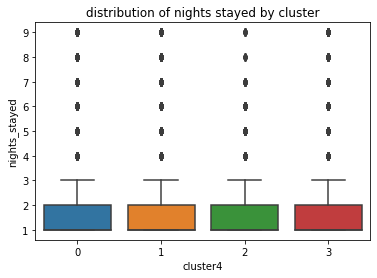

In [32]:
ax = sns.boxplot(data = cluster_data, x = 'cluster4', y = 'nights_stayed')
ax.set(title = 'distribution of nights stayed by cluster')

In [33]:
cluster_data_pivot = cluster_data.pivot_table(values='price',index='cluster4', columns='nationality',
                          aggfunc='count')
cluster_data_pivot

nationality,Foreigner,Philippines
cluster4,,
0,15671,17651
1,10920,6344
2,1214,584
3,3582,1885


In [34]:
cluster_data_pivot = cluster_data.pivot_table(values='price',index='cluster4', columns='occupant_type',
                          aggfunc='count')
cluster_data_pivot

occupant_type,Couple,Family,Group,Solo traveler
cluster4,,,,
0,11412,6293,3575,12042
1,5872,4724,2091,4577
2,544,661,242,351
3,1786,1900,670,1111


In [35]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster5'])
cluster_data_group = cluster_data_group.groupby('cluster5').agg(pd.Series.mode)
cluster_data_group

,review_score,price,nights_stayed,occupant_type,nationality
cluster5,,,,,
0,10.0,6000.0,1,Couple,Foreigner
1,10.0,3055.0,1,Couple,Foreigner
2,10.0,7200.0,1,Family,Foreigner
3,10.0,1887.0,1,Solo traveler,Philippines
4,10.0,10800.0,1,Family,Foreigner


In [67]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster6'])
cluster_data_group = cluster_data_group.groupby('cluster6').agg(pd.Series.mode)
cluster_data_group

,review_score,price,nights_stayed,occupant_type,nationality
cluster6,,,,,
0,10.0,3055.0,1,Couple,Foreigner
1,10.0,1385.0,1,Solo traveler,Philippines
2,10.0,10800.0,1,Family,Foreigner
3,10.0,6000.0,1,Couple,Foreigner
4,10.0,1887.0,1,Couple,Foreigner
5,10.0,7200.0,1,Family,Foreigner


In [68]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster7'])
cluster_data_group = cluster_data_group.groupby('cluster7').agg(pd.Series.mode)
cluster_data_group

,review_score,price,nights_stayed,occupant_type,nationality
cluster7,,,,,
0,10.0,7200.0,1,Family,Foreigner
1,10.0,6000.0,1,Couple,Foreigner
2,10.0,3055.0,1,Couple,Foreigner
3,10.0,1385.0,1,Solo traveler,Philippines
4,10.0,3532.0,1,Couple,Foreigner
5,10.0,1887.0,1,Couple,Foreigner
6,10.0,10800.0,1,Family,Foreigner


In [69]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster8'])
cluster_data_group = cluster_data_group.groupby('cluster8').agg(pd.Series.mode)
cluster_data_group

,review_score,price,nights_stayed,occupant_type,nationality
cluster8,,,,,
0,10.0,6000.0,1,Couple,Foreigner
1,10.0,5179.0,1,Family,Foreigner
2,10.0,10800.0,1,Family,Foreigner
3,10.0,7200.0,1,Family,Foreigner
4,10.0,3055.0,1,Couple,Foreigner
5,10.0,1887.0,1,Solo traveler,Foreigner
6,10.0,1385.0,1,Solo traveler,Philippines
7,10.0,3532.0,1,Couple,Foreigner


In [70]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster9'])
cluster_data_group = cluster_data_group.groupby('cluster9').agg(pd.Series.mode)
cluster_data_group

,review_score,price,nights_stayed,occupant_type,nationality
cluster9,,,,,
0,10.0,1385.0,1,Solo traveler,Foreigner
1,10.0,7200.0,1,Family,Foreigner
2,10.0,6000.0,1,Couple,Foreigner
3,10.0,10800.0,1,Family,Foreigner
4,10.0,1276.0,1,Solo traveler,Philippines
5,10.0,3532.0,1,Couple,Foreigner
6,10.0,3055.0,1,Couple,Foreigner
7,10.0,5179.0,1,Family,Foreigner
8,10.0,1887.0,1,Couple,Foreigner


In [ ]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster10'])
cluster_data_group = cluster_data_group.groupby('cluster10').agg(pd.Series.mode)
cluster_data_group

CLUSTER SET 2
Features:
1. price
2. occupant_type
3. nationality

In [36]:
cluster_data2 = data2.copy()
cluster_data2 = cluster_data2.filter(['customer_ind','price','occupant_type','nationality'])
cluster_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_ind   57851 non-null  object 
 1   price          57851 non-null  float64
 2   occupant_type  57851 non-null  object 
 3   nationality    57851 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.2+ MB


In [37]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs2=[]
n_clusters2 = []
clusters_assigned2 = []

for i in tqdm(range(1,11)):
    try:
        kproto2 = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters2 = kproto2.fit_predict(cluster_data2, categorical=[0,2,3])
        costs2.append(kproto2.cost_)
        n_clusters2.append(i)
        clusters_assigned2.append(clusters2)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376795388143.8631
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376795388143.8631
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376795388143.8631
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376795388143.8631
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376795388143.8631
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376795388143.8631
Init: initializing centroids
Init: initializing clusters
Starting iterations..

 10%|████████▎                                                                          | 1/10 [01:19<11:58, 79.80s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 22622, ncost: 175274512963.2998
Run: 1, iteration: 2/100, moves: 7795, ncost: 130236319714.89871
Run: 1, iteration: 3/100, moves: 1453, ncost: 127261635935.35812
Run: 1, iteration: 4/100, moves: 212, ncost: 127181933512.09248
Run: 1, iteration: 5/100, moves: 0, ncost: 127181933512.09248
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 35462, ncost: 208647924938.87076
Run: 2, iteration: 2/100, moves: 12678, ncost: 138179345994.33084
Run: 2, iteration: 3/100, moves: 2324, ncost: 128890031291.00417
Run: 2, iteration: 4/100, moves: 974, ncost: 127246294794.40134
Run: 2, iteration: 5/100, moves: 180, ncost: 127181933512.09248
Run: 2, iteration: 6/100, moves: 0, ncost: 127181933512.09248
Init: initializing centroids
Init: initializing clusters

 20%|████████████████▍                                                                 | 2/10 [04:51<20:58, 157.31s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 24215, ncost: 141236526975.53775
Run: 1, iteration: 2/100, moves: 13766, ncost: 97483329244.10648
Run: 1, iteration: 3/100, moves: 6713, ncost: 89220503592.36113
Run: 1, iteration: 4/100, moves: 4783, ncost: 78686124815.89383
Run: 1, iteration: 5/100, moves: 1587, ncost: 78065117293.67719
Run: 1, iteration: 6/100, moves: 83, ncost: 78064453783.19853
Run: 1, iteration: 7/100, moves: 0, ncost: 78064453783.19853
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 8313, ncost: 94196231994.6364
Run: 2, iteration: 2/100, moves: 2303, ncost: 87054294243.22144
Run: 2, iteration: 3/100, moves: 3098, ncost: 78475952967.38467
Run: 2, iteration: 4/100, moves: 1147, ncost: 78064629626.3565
Run: 2, iteration: 5/100, moves: 43, ncost: 78064453783.19853
Ru

 30%|████████████████████████▌                                                         | 3/10 [08:46<22:30, 192.99s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11007, ncost: 46750298787.28468
Run: 1, iteration: 2/100, moves: 5755, ncost: 42406750768.96098
Run: 1, iteration: 3/100, moves: 3281, ncost: 39346734327.31603
Run: 1, iteration: 4/100, moves: 1366, ncost: 39218369378.198265
Run: 1, iteration: 5/100, moves: 198, ncost: 39215830084.1146
Run: 1, iteration: 6/100, moves: 32, ncost: 39215772219.87493
Run: 1, iteration: 7/100, moves: 0, ncost: 39215772219.87493
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 17851, ncost: 81571898410.94066
Run: 2, iteration: 2/100, moves: 4467, ncost: 69903902819.58875
Run: 2, iteration: 3/100, moves: 9037, ncost: 53847958379.16157
Run: 2, iteration: 4/100, moves: 8160, ncost: 45688449504.65111
Run: 2, iteration: 5/100, moves: 5217, ncost: 42006167855.23217


 40%|████████████████████████████████▊                                                 | 4/10 [14:03<24:11, 241.97s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12491, ncost: 56678095342.36414
Run: 1, iteration: 2/100, moves: 6512, ncost: 38391171960.845726
Run: 1, iteration: 3/100, moves: 1207, ncost: 36287881381.29415
Run: 1, iteration: 4/100, moves: 711, ncost: 34326852904.097897
Run: 1, iteration: 5/100, moves: 208, ncost: 34303609475.786873
Run: 1, iteration: 6/100, moves: 26, ncost: 34303597437.763977
Run: 1, iteration: 7/100, moves: 0, ncost: 34303597437.763977
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 13593, ncost: 55360981083.9528
Run: 2, iteration: 2/100, moves: 7958, ncost: 38683074995.25183
Run: 2, iteration: 3/100, moves: 4047, ncost: 36430103015.728645
Run: 2, iteration: 4/100, moves: 2797, ncost: 34341500291.24643
Run: 2, iteration: 5/100, moves: 846, ncost: 34306073521.806

 50%|█████████████████████████████████████████                                         | 5/10 [19:21<22:26, 269.37s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12311, ncost: 37066557530.03381
Run: 1, iteration: 2/100, moves: 7440, ncost: 31949720536.78766
Run: 1, iteration: 3/100, moves: 5461, ncost: 29330700399.44471
Run: 1, iteration: 4/100, moves: 1098, ncost: 29004616996.19351
Run: 1, iteration: 5/100, moves: 2253, ncost: 27210343832.881824
Run: 1, iteration: 6/100, moves: 558, ncost: 27121929547.492012
Run: 1, iteration: 7/100, moves: 0, ncost: 27121929547.492012
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 24088, ncost: 27827192269.024254
Run: 2, iteration: 2/100, moves: 5151, ncost: 27142950094.31877
Run: 2, iteration: 3/100, moves: 2435, ncost: 26991814887.75666
Run: 2, iteration: 4/100, moves: 174, ncost: 26991051830.8827
Run

Run: 10, iteration: 4/100, moves: 69, ncost: 28235729246.481678
Run: 10, iteration: 5/100, moves: 119, ncost: 28234963409.94523
Run: 10, iteration: 6/100, moves: 0, ncost: 28234963409.94523
Best run was number 2


 60%|█████████████████████████████████████████████████▏                                | 6/10 [26:45<21:55, 328.77s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14184, ncost: 40185802818.29703
Run: 1, iteration: 2/100, moves: 5148, ncost: 32752321449.004593
Run: 1, iteration: 3/100, moves: 3800, ncost: 28713975068.509056
Run: 1, iteration: 4/100, moves: 1909, ncost: 28155777106.33765
Run: 1, iteration: 5/100, moves: 904, ncost: 27739212234.47663
Run: 1, iteration: 6/100, moves: 1977, ncost: 25965204158.886063
Run: 1, iteration: 7/100, moves: 1015, ncost: 25639990158.23731
Run: 1, iteration: 8/100, moves: 1171, ncost: 25555305532.910458
Run: 1, iteration: 9/100, moves: 932, ncost: 25530052102.011456
Run: 1, iteration: 10/100, moves: 232, ncost: 25528442225.390495
Run: 1, iteration: 11/100, m

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [33:48<17:57, 359.29s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

Starting iterations...
Run: 10, iteration: 1/100, moves: 12684, ncost: 39597951865.07412
Run: 10, iteration: 2/100, moves: 8110, ncost: 30175453279.86433
Run: 10, iteration: 3/100, moves: 3963, ncost: 26985673981.863182
Run: 10, iteration: 4/100, moves: 4936, ncost: 24268234564.937046
Run: 10, iteration: 5/100, moves: 4244, ncost: 23979301006.801765
Run: 10, iteration: 6/100, moves: 1702, ncost: 23935766950.788258
Run: 10, iteration: 7/100, moves: 1682, ncost: 23895426329.78578
Run: 10, iteration: 8/100, moves: 255, ncost: 23894463675.26268
Run: 10, iteration: 9/100, moves: 108, ncost: 23894297611.890747
Run: 10, iteration: 10/100, moves: 11, ncost: 23894296325.155346
Run: 10, iteration: 11/100, moves: 0, ncost: 23894296325.155346
Best run was number 6


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [41:27<13:02, 391.33s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12309, ncost: 41619846262.35647
Run: 1, iteration: 2/100, moves: 7194, ncost: 32352356448.6726
Run: 1, iteration: 3/100, moves: 6037, ncost: 28007982019.057186
Run: 1, iteration: 4/100, moves: 5295, ncost: 27111697971.36223
Run: 1, iteration: 5/100, moves: 9348, ncost: 23905714339.22466
Run: 1, iteration: 6/100, moves: 4751, ncost: 23511007246.22241
Run: 1, iteration: 7/100, moves: 3773, ncost: 23411465680.87

Run: 8, iteration: 3/100, moves: 6908, ncost: 31515573066.738976
Run: 8, iteration: 4/100, moves: 5060, ncost: 28294798744.494095
Run: 8, iteration: 5/100, moves: 4261, ncost: 27440781787.996887
Run: 8, iteration: 6/100, moves: 2560, ncost: 26697717329.12306
Run: 8, iteration: 7/100, moves: 4581, ncost: 24433927906.325222
Run: 8, iteration: 8/100, moves: 5377, ncost: 23530575268.32342
Run: 8, iteration: 9/100, moves: 3782, ncost: 23329323613.066048
Run: 8, iteration: 10/100, moves: 840, ncost: 23321110842.063824
Run: 8, iteration: 11/100, moves: 494, ncost: 23317723971.131794
Run: 8, iteration: 12/100, moves: 459, ncost: 23310952913.292683
Run: 8, iteration: 13/100, moves: 207, ncost: 23310688233.20581
Run: 8, iteration: 14/100, moves: 21, ncost: 23310683806.792725
Run: 8, iteration: 15/100, moves: 0, ncost: 23310683806.792725
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [51:55<07:45, 465.21s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13296, ncost: 29076875883.21211
Run: 1, iteration: 2/100, moves: 5302, ncost: 25603779619.363632
Run: 1, iteration: 3/100, moves: 4938, ncost: 23042656572.50573
Run: 1, iteration: 4/100, moves: 2591, ncost: 22694413826.737347
Run: 1, iteration: 5/100, moves: 2702, ncost: 22470224151.809536
Run: 1, iteration: 6/100, moves: 1504, ncost: 22369048059.23009
Run: 1, iteration: 7/100, moves: 210, ncost: 22368690322.77537
Run: 1, iteration: 8/100, moves: 68, ncost: 22368657453.98853
Run: 1, iteration: 9/100, moves: 0, ncost: 22368657453.98853
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 11494, ncost: 29670705148.505737
Run: 2, it

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [58:46<00:00, 352.70s/it]


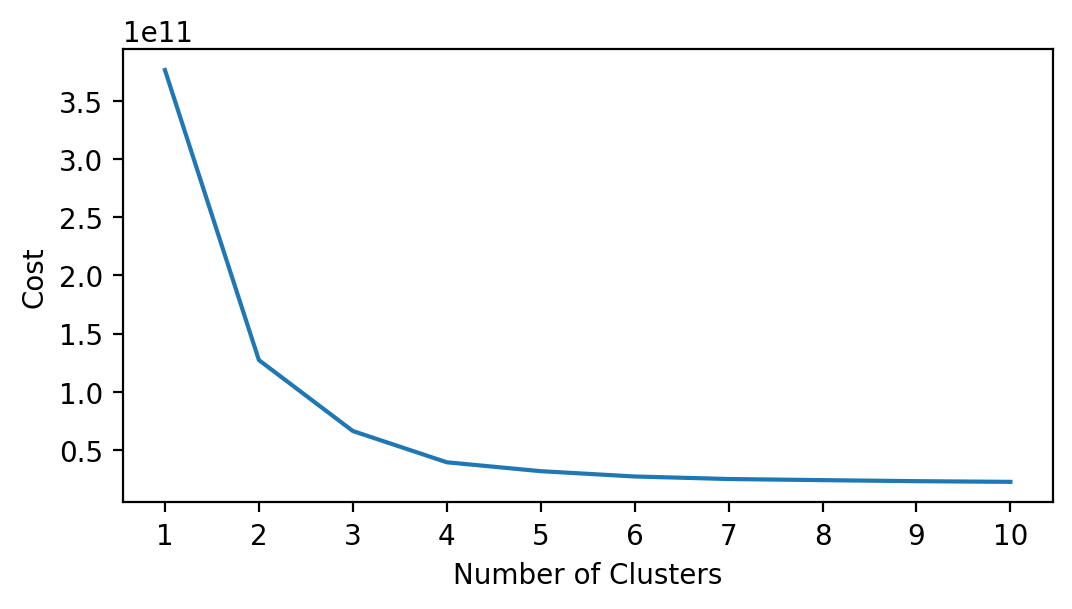

In [38]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), costs2)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [39]:
cluster_data2['cluster1'] = clusters_assigned2[0]
cluster_data2['cluster2'] = clusters_assigned2[1]
cluster_data2['cluster3'] = clusters_assigned2[2]
cluster_data2['cluster4'] = clusters_assigned2[3]
cluster_data2['cluster5'] = clusters_assigned2[4]
cluster_data2['cluster6'] = clusters_assigned2[5]
cluster_data2['cluster7'] = clusters_assigned2[6]
cluster_data2['cluster8'] = clusters_assigned2[7]
cluster_data2['cluster9'] = clusters_assigned2[8]
cluster_data2['cluster10'] = clusters_assigned2[9]
cluster_data2

,customer_ind,price,occupant_type,nationality,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
1,1,1590.0,Family,Philippines,0,0,1,0,2,1,1,2,8,8
3,3,977.0,Solo traveler,Foreigner,0,0,1,0,2,1,3,7,0,0
4,4,1590.0,Family,Foreigner,0,0,1,0,2,1,1,2,8,8
5,5,2308.0,Family,Philippines,0,0,1,0,1,0,1,2,4,4
7,7,2308.0,Family,Philippines,0,0,1,0,1,0,1,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76495,76495,2505.0,Couple,Foreigner,0,0,1,3,1,0,4,1,4,4
76510,76510,2912.0,Family,Foreigner,0,0,1,3,1,4,4,1,1,5
76511,76511,2651.0,Family,Philippines,0,0,1,3,1,4,4,1,1,5
76515,76515,2651.0,Group,Foreigner,0,0,1,3,1,4,4,1,1,5


In [40]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster4'])
cluster_data_group2 = cluster_data_group2.groupby('cluster4').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster4,,,
0,1887.0,Solo traveler,Philippines
1,6000.0,Family,Foreigner
2,10800.0,Family,Foreigner
3,3055.0,Couple,Foreigner


In [41]:
cluster_data2_pivot = cluster_data2.pivot_table(values='price',index='cluster4', columns=['nationality','occupant_type'],
                          aggfunc='count')
cluster_data2_pivot

nationality   Foreigner                            Philippines               \
occupant_type    Couple Family Group Solo traveler      Couple Family Group   
cluster4                                                                      
0                  4855   2823  1646          6347        6557   3470  1929   
1                  1206   1042   443           891         580    858   227   
2                   395    341   172           306         149    320    70   
3                  3741   2643  1281          3255        2131   2081   810   

nationality                  
occupant_type Solo traveler  
cluster4                     
0                      5695  
1                       220  
2                        45  
3                      1322

In [42]:
cluster_data2_pivot = cluster_data2.pivot_table(values='price',index='cluster4', columns='nationality',
                          aggfunc='count')
cluster_data2_pivot

nationality,Foreigner,Philippines
cluster4,,
0,15671,17651
1,3582,1885
2,1214,584
3,10920,6344


In [ ]:
ax = sns.boxplot(data = cluster_data2, x = 'cluster4', y = 'price')
ax.set(title = 'distribution of price by cluster')

In [71]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster5'])
cluster_data_group2 = cluster_data_group2.groupby('cluster5').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster5,,,
0,10800.0,Family,Foreigner
1,3055.0,Couple,Foreigner
2,1887.0,Solo traveler,Philippines
3,7200.0,Family,Foreigner
4,6000.0,Couple,Foreigner


In [ ]:
cluster_data2_pivot = cluster_data2.pivot_table(values='price',index='cluster5', columns='nationality',
                          aggfunc='count')
cluster_data2_pivot

In [ ]:
cluster_data2_pivot = cluster_data2.pivot_table(values='price',index='cluster5', columns=['nationality','occupant_type'],
                          aggfunc='count')
cluster_data2_pivot

In [ ]:
ax = sns.boxplot(data = cluster_data2, x = 'cluster5', y = 'price')
ax.set(title = 'distribution of price by cluster')

In [72]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster6'])
cluster_data_group2 = cluster_data_group2.groupby('cluster6').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster6,,,
0,1887.0,Couple,Foreigner
1,1385.0,Solo traveler,Philippines
2,7200.0,Family,Foreigner
3,10800.0,Family,Foreigner
4,3055.0,Couple,Foreigner
5,6000.0,Family,Foreigner


In [ ]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster7'])
cluster_data_group2 = cluster_data_group2.groupby('cluster7').agg(pd.Series.mode)
cluster_data_group2

In [ ]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster8'])
cluster_data_group2 = cluster_data_group2.groupby('cluster8').agg(pd.Series.mode)
cluster_data_group2

In [ ]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster9'])
cluster_data_group2 = cluster_data_group2.groupby('cluster9').agg(pd.Series.mode)
cluster_data_group2

In [ ]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster10'])
cluster_data_group2 = cluster_data_group2.groupby('cluster10').agg(pd.Series.mode)
cluster_data_group2

In [ ]:
data2[['nationality','occupant_type']].value_counts()

In [ ]:
data2['occupant_type'].unique()

# cluster set 3

In [43]:
cluster_data3 = data2.copy()
cluster_data3 = cluster_data3.filter(['customer_ind','price','occupant_type'])
cluster_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_ind   57851 non-null  object 
 1   price          57851 non-null  float64
 2   occupant_type  57851 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


In [44]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs3=[]
n_clusters3 = []
clusters_assigned3 = []

for i in tqdm(range(1,11)):
    try:
        kproto3 = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters3 = kproto3.fit_predict(cluster_data3, categorical=[0,2])
        costs3.append(kproto3.cost_)
        n_clusters3.append(i)
        clusters_assigned3.append(clusters3)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376761625789.4601
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376761625789.4601
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376761625789.4601
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376761625789.4601
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376761625789.4601
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376761625789.4601
Init: initializing centroids
Init: initializing clusters
Starting iterations..

 10%|████████▎                                                                          | 1/10 [01:15<11:17, 75.31s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9452, ncost: 137342101165.82933
Run: 1, iteration: 2/100, moves: 2178, ncost: 128856268936.64346
Run: 1, iteration: 3/100, moves: 974, ncost: 127212532440.04121
Run: 1, iteration: 4/100, moves: 180, ncost: 127148171157.72417
Run: 1, iteration: 5/100, moves: 0, ncost: 127148171157.72417
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 4592, ncost: 129706427545.00902
Run: 2, iteration: 2/100, moves: 1300, ncost: 127227873580.99648
Run: 2, iteration: 3/100, moves: 212, ncost: 127148171157.72417
Run: 2, iteration: 4/100, moves: 0, ncost: 127148171157.72417
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 216, ncost: 129900468447.01651
Run: 3, iteration: 2/100, moves: 11, ncost: 

 20%|████████████████▍                                                                 | 2/10 [04:46<20:40, 155.03s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9588, ncost: 91082335028.9531
Run: 1, iteration: 2/100, moves: 5047, ncost: 78957269932.02461
Run: 1, iteration: 3/100, moves: 2282, ncost: 78037088227.93587
Run: 1, iteration: 4/100, moves: 155, ncost: 78032228748.8558
Run: 1, iteration: 5/100, moves: 0, ncost: 78032228748.8558
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 22679, ncost: 116272507248.87537
Run: 2, iteration: 2/100, moves: 13517, ncost: 93106975189.57144
Run: 2, iteration: 3/100, moves: 8112, ncost: 79036515730.8231
Run: 2, iteration: 4/100, moves: 2473, ncost: 78038170151.9794
Run: 2, iteration: 5/100, moves: 183, ncost: 78032228748.8558
Run: 2, iteration: 6/100, moves: 0, ncost: 78032228748.8558
Init: initializ

 30%|████████████████████████▌                                                         | 3/10 [07:52<19:45, 169.37s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 18117, ncost: 104774654906.81142
Run: 1, iteration: 2/100, moves: 14569, ncost: 85758427935.49065
Run: 1, iteration: 3/100, moves: 11185, ncost: 72016617476.99634
Run: 1, iteration: 4/100, moves: 6819, ncost: 67153545854.65616
Run: 1, iteration: 5/100, moves: 8813, ncost: 53618244077.92722
Run: 1, iteration: 6/100, moves: 8780, ncost: 45666919969.71633
Run: 1, iteration: 7/100, moves: 5250, ncost: 41975608995.12168
Run: 1, iteration: 8/100, moves: 3095, ncost: 39315649844.0937
Run: 1, iteration: 9/100, moves: 1393, ncost: 39186609627.37829
Run: 1, iteration: 10/100, moves: 184, ncost: 39184556319.444916
Run: 1, iteration: 11/100, moves: 19, ncost: 39184535918.325165
Run: 1, iteration: 12/100, moves: 0, ncost: 39184535918.325165
Init: initializing centroids
Init: initializing clusters
Init: initializi

 40%|████████████████████████████████▊                                                 | 4/10 [12:16<20:39, 206.56s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 16859, ncost: 39285675079.72745
Run: 1, iteration: 2/100, moves: 5464, ncost: 33726348773.67925
Run: 1, iteration: 3/100, moves: 1007, ncost: 33481805820.704742
Run: 1, iteration: 4/100, moves: 2000, ncost: 31978221626.226364
Run: 1, iteration: 5/100, moves: 1346, ncost: 31524932551.676098
Run: 1, iteration: 6/100, moves: 164, ncost: 31520755846.460236
Run: 1, iteration: 7/100, moves: 97, ncost: 31520295581.21398
Run: 1, iteration: 8/100, moves: 0, ncost: 31520295581.21398
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9598, ncost: 44450923155.07796
Run: 2, iteration: 2/100, moves: 4198, ncost: 36979618112.57349
Run: 2, iteration: 3/100, moves: 2308, ncost: 33725565980.91161
Run: 2, iteration: 4/100, moves: 478, ncost: 33652835241.4353

 50%|█████████████████████████████████████████                                         | 5/10 [16:35<18:47, 225.46s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9305, ncost: 36346290302.04582
Run: 1, iteration: 2/100, moves: 6105, ncost: 31699214590.120705
Run: 1, iteration: 3/100, moves: 2235, ncost: 29328963482.717937
Run: 1, iteration: 4/100, moves: 1055, ncost: 28975329267.57598
Run: 1, iteration: 5/100, moves: 2098, ncost: 27182093290.088085
Run: 1, iteration: 6/100, moves: 558, ncost: 27093474875.357258
Run: 1, iteration: 7/100, moves: 10, ncost: 27093473179.824093
Run: 1, iteration: 8/100, moves: 0, ncost: 27093473179.824093
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 8482, ncost: 31961761221.221466
Run: 8, iteration: 2/100, moves: 3426, ncost: 29489578167.74023
Run: 8, iteration: 3/100, moves: 3072, ncost: 28981433862.926167
Run: 8, iteration: 4/100, moves: 2540, ncost: 27183217773.08239
Run: 8, iteration: 5/100, moves: 697, ncost: 27093605427.385345
Run: 8, iteration: 6/100, moves: 74, ncost: 27093496380.119633
Run: 8, iteration: 7/100, moves: 37, ncost: 27093473179.824093
Run: 8, iteration: 8/100, moves: 0, ncost: 27093473179.824093
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 13317, ncost: 37323751430.66195
Run: 9, iteration: 2/100, moves: 5276, ncost: 31141389859.32671
Run: 9, iteration: 3/100, move

 60%|█████████████████████████████████████████████████▏                                | 6/10 [23:47<19:43, 295.93s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 18667, ncost: 31867466168.2008
Run: 1, iteration: 2/100, moves: 7074, ncost: 25357462904.771587
Run: 1, iteration: 3/100, moves: 2739, ncost: 24807871092.11872
Run: 1, iteration: 4/100, moves: 883, ncost: 24798455540.626133
Run: 1, iteration: 5/100, moves: 50, ncost: 24798417057.931526
Run: 1, iteration: 6/100, moves: 0, ncost: 24798417057.931526
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 12189, 

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [28:07<14:11, 283.96s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 16807, ncost: 27475204866.07798
Run: 1, iteration: 2/100, moves: 6028, ncost: 23936744045.232018
Run: 1, iteration: 3/100, moves: 1747, ncost: 23896534866.148605
Run: 1, iteration: 4/100, moves: 187, ncost: 23895429329.08926
Run: 1, iteration: 5/100, moves: 0, ncost: 23895429329.08926
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 18810, ncost: 14681497282.524271
Run: 2, iteration: 2/100, moves: 5851, ncost: 14086495297.552654
Run: 2, iteration: 3/100, moves: 1294, ncost: 14072513251.556324
Run: 2, iteration: 4/100, moves: 94, ncost: 14072384238.826355
Run: 2, iteration: 5/100, moves: 0, ncost: 14072384238.826355
Init: init

Run: 10, iteration: 6/100, moves: 7168, ncost: 28266517122.177082
Run: 10, iteration: 7/100, moves: 6196, ncost: 27477398868.624325
Run: 10, iteration: 8/100, moves: 5819, ncost: 25432561831.510147
Run: 10, iteration: 9/100, moves: 4040, ncost: 25037748172.861767
Run: 10, iteration: 10/100, moves: 1921, ncost: 24920703924.05526
Run: 10, iteration: 11/100, moves: 2285, ncost: 24845096114.867397
Run: 10, iteration: 12/100, moves: 2595, ncost: 24726426148.73287
Run: 10, iteration: 13/100, moves: 1845, ncost: 24660104094.52871
Run: 10, iteration: 14/100, moves: 689, ncost: 24650190048.902
Run: 10, iteration: 15/100, moves: 113, ncost: 24649860303.504284
Run: 10, iteration: 16/100, moves: 11, ncost: 24649856814.363186
Run: 10, iteration: 17/100, moves: 0, ncost: 24649856814.363186
Best run was number 2


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [34:41<10:37, 319.00s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 22617, ncost: 29270229088.015697
Run: 1, iteration: 2/100, moves: 5070, ncost: 23994811025.99949
Run: 1, iteration: 3/100, moves: 2219, ncost: 23674391907.346222
Run: 1, iteration: 4/100, moves: 727, ncost: 23589296298.495483
Run: 1, iteration: 5/100, moves: 645, ncost: 23530842994.51106
Run: 1, iteration: 6/100, moves: 241, ncost: 23521300740.84255
Run: 1, iteration: 7/100, moves: 46, ncost: 23520978065.312023
Run: 1, iteration: 8/100, moves: 0, ncost: 23520978065.312023
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing c

Run: 9, iteration: 6/100, moves: 32, ncost: 22912763092.643044
Run: 9, iteration: 7/100, moves: 0, ncost: 22912763092.643044
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 16074, ncost: 23878320155.01391
Run: 10, iteration: 2/100, moves: 8432, ncost: 14813800048.082657
Run: 10, iteration: 3/100, moves: 2922, ncost: 13060981430.434614
Run: 10, iteration: 4/100, moves: 1736, ncost: 12470923360.251383
Run: 10, iteration: 5/100, moves: 2121, ncost: 12409571590.170586
Run: 10, iteration: 6/100, moves: 2787, ncost: 12347854179.061949
Run: 10, iteration: 7/100, moves: 1427, ncost: 12334372502.976511
Run: 10, iteration: 8/100, moves: 244, ncost: 12333768444.538336
Run: 10, iteration: 9/100, moves: 10, ncost: 12333767068.81298
Run: 10, iteration: 10/100, moves: 0, ncost: 12333767068.81298
Best run was number 10


 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [41:02<05:38, 338.58s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9057, ncost: 23522704669.890736
Run: 1, iteration: 2/100, moves: 3922, ncost: 23400839898.068493
Run: 1, iteration: 3/100, moves: 701, ncost: 23390760186.40647
Run: 1, iteration: 4/100, moves: 681, ncost: 23383564322.679142
Run: 1, iteration: 5/100, moves: 54, ncost: 23383527682.31156
Run: 1, iteration: 6/100, moves: 0, ncost: 23383527682.31156
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 13860, nc

Run: 9, iteration: 5/100, moves: 1397, ncost: 23054249357.11676
Run: 9, iteration: 6/100, moves: 78, ncost: 23052801634.132633
Run: 9, iteration: 7/100, moves: 160, ncost: 23046767838.665157
Run: 9, iteration: 8/100, moves: 0, ncost: 23046767838.665157
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 10632, ncost: 30865953225.435028
Run: 10, iteration: 2/100, moves: 3681, ncost: 23087099170.628162
Run: 10, iteration: 3/100, moves: 1165, ncost: 22450456615.161495
Run: 10, iteration: 4/100, moves: 659, ncost: 22339858342.127663
Run: 10, iteration: 5/100, moves: 20, ncost: 22339750423.936054
Run: 10, iteration: 6/100, moves: 0, ncost: 22339750423.936054
Best run was number 10


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [47:23<00:00, 284.37s/it]


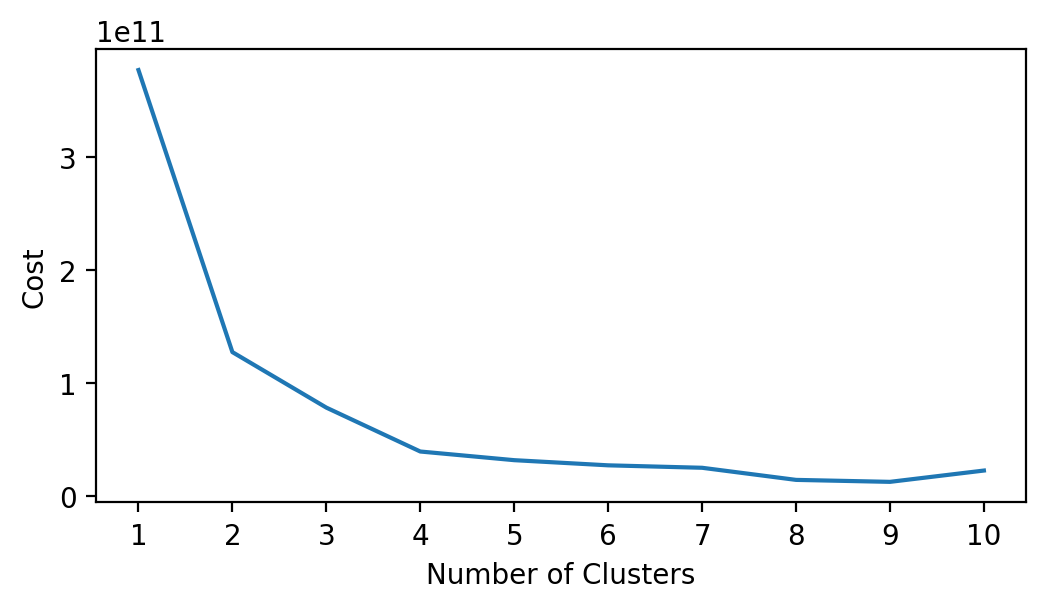

In [45]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), costs3)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [46]:
cluster_data3['cluster1'] = clusters_assigned3[0]
cluster_data3['cluster2'] = clusters_assigned3[1]
cluster_data3['cluster3'] = clusters_assigned3[2]
cluster_data3['cluster4'] = clusters_assigned3[3]
cluster_data3['cluster5'] = clusters_assigned3[4]
cluster_data3['cluster6'] = clusters_assigned3[5]
cluster_data3['cluster7'] = clusters_assigned3[6]
cluster_data3['cluster8'] = clusters_assigned3[7]
cluster_data3['cluster9'] = clusters_assigned3[8]
cluster_data3['cluster10'] = clusters_assigned3[9]
cluster_data3

,customer_ind,price,occupant_type,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
1,1,1590.0,Family,0,0,1,1,2,1,4,0,4,3
3,3,977.0,Solo traveler,0,0,1,1,2,1,3,2,2,6
4,4,1590.0,Family,0,0,1,1,2,1,4,0,4,3
5,5,2308.0,Family,0,0,1,1,0,4,4,6,1,5
7,7,2308.0,Family,0,0,1,1,0,4,4,6,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76495,76495,2505.0,Couple,0,0,1,0,0,4,5,6,1,5
76510,76510,2912.0,Family,0,0,0,0,0,0,5,1,8,9
76511,76511,2651.0,Family,0,0,1,0,0,0,5,6,8,9
76515,76515,2651.0,Group,0,0,1,0,0,0,5,6,8,9


In [47]:
# Inspect the characteristics of chosen cluster
cluster_data_group3 = cluster_data3.filter(['price','occupant_type','cluster4'])
cluster_data_group3 = cluster_data_group3.groupby('cluster4').agg(pd.Series.mode)
cluster_data_group3

,price,occupant_type
cluster4,,
0,3055.0,Couple
1,1887.0,Solo traveler
2,10800.0,Family
3,6000.0,Family


In [48]:
cluster_data3_pivot = cluster_data3.pivot_table(values='price',index='cluster4', columns=['occupant_type'],
                          aggfunc='count')
cluster_data3_pivot

occupant_type,Couple,Family,Group,Solo traveler
cluster4,,,,
0,5872,4724,2091,4577
1,11412,6293,3575,12042
2,544,661,242,351
3,1786,1900,670,1111


[Text(0.5, 1.0, 'distribution of price by cluster')]

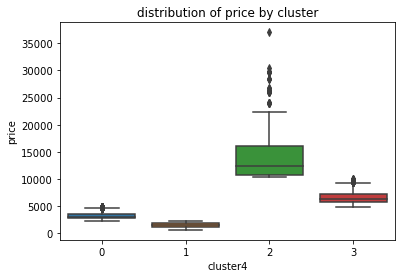

In [49]:
ax = sns.boxplot(data = cluster_data3, x = 'cluster4', y = 'price')
ax.set(title = 'distribution of price by cluster')

In [ ]:
# Inspect the characteristics of chosen cluster
cluster_data_group3 = cluster_data3.filter(['price','occupant_type','cluster5'])
cluster_data_group3 = cluster_data_group3.groupby('cluster5').agg(pd.Series.mode)
cluster_data_group3

In [ ]:
cluster_data3_pivot = cluster_data3.pivot_table(values='price',index='cluster5', columns=['occupant_type'],
                          aggfunc='count')
cluster_data3_pivot

In [ ]:
ax = sns.boxplot(data = cluster_data3, x = 'cluster5', y = 'price')
ax.set(title = 'distribution of price by cluster')

In [ ]:
# Inspect the characteristics of chosen cluster
cluster_data_group3 = cluster_data3.filter(['price','occupant_type','cluster6'])
cluster_data_group3 = cluster_data_group3.groupby('cluster6').agg(pd.Series.mode)
cluster_data_group3

In [ ]:
cluster_data3_pivot = cluster_data3.pivot_table(values='price',index='cluster6', columns=['occupant_type'],
                          aggfunc='count')
cluster_data3_pivot

In [ ]:
ax = sns.boxplot(data = cluster_data3, x = 'cluster6', y = 'price')
ax.set(title = 'distribution of price by cluster')

# Cluster set 4

In [50]:
cluster_data4 = data2.copy()

In [51]:
#create a column for good stay

def review_score_class(review_score):
    if review_score >= 7.5:
        return "1"
    else:
        return "0"
    
cluster_data4.loc[:, 'is_good_stay'] = df['review_score'].apply(review_score_class)

In [52]:
cluster_data4 = cluster_data4.filter(['customer_ind','price','is_good_stay','occupant_type'])
cluster_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_ind   57851 non-null  object 
 1   price          57851 non-null  float64
 2   is_good_stay   57851 non-null  object 
 3   occupant_type  57851 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.2+ MB


In [53]:
cluster_data4.head()

,customer_ind,price,is_good_stay,occupant_type
1,1,1590.0,0,Family
3,3,977.0,0,Solo traveler
4,4,1590.0,0,Family
5,5,2308.0,0,Family
7,7,2308.0,0,Family


In [54]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs4=[]
n_clusters4 = []
clusters_assigned4 = []

for i in tqdm(range(1,11)):
    try:
        kproto4 = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters4 = kproto4.fit_predict(cluster_data4, categorical=[0,2,3])
        costs4.append(kproto4.cost_)
        n_clusters4.append(i)
        clusters_assigned4.append(clusters4)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376785729181.28174
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376785729181.28174
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376785729181.28174
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376785729181.28174
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376785729181.28174
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376785729181.28174
Init: initializing centroids
Init: initializing clusters
Starting iterat

 10%|████████▎                                                                          | 1/10 [00:58<08:49, 58.79s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 15054, ncost: 164683302305.18875
Run: 1, iteration: 2/100, moves: 6172, ncost: 130197459061.42754
Run: 1, iteration: 3/100, moves: 1445, ncost: 127251976972.80344
Run: 1, iteration: 4/100, moves: 212, ncost: 127172274549.5389
Run: 1, iteration: 5/100, moves: 0, ncost: 127172274549.5389
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2627, ncost: 128899727124.80307
Run: 2, iteration: 2/100, moves: 985, ncost: 127236635831.85956
Run: 2, iteration: 3/100, moves: 180, ncost: 127172274549.5389
Run: 2, iteration: 4/100, moves: 0, ncost: 127172274549.5389
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 127172415237.21947
Init: initializing centroids
Init: initializing c

 20%|████████████████▍                                                                 | 2/10 [03:22<14:28, 108.53s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 19771, ncost: 100513741531.57895
Run: 1, iteration: 2/100, moves: 11925, ncost: 89850007750.45067
Run: 1, iteration: 3/100, moves: 5383, ncost: 78696318880.41255
Run: 1, iteration: 4/100, moves: 1646, ncost: 78056995651.15065
Run: 1, iteration: 5/100, moves: 83, ncost: 78056332140.66939
Run: 1, iteration: 6/100, moves: 0, ncost: 78056332140.66939
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2821, ncost: 67721128914.32613
Run: 2, iteration: 2/100, moves: 619, ncost: 66108230083.72155
Run: 2, iteration: 3/100, moves: 31, ncost: 66106680526.9401
Run: 2, iteration: 4/100, moves: 0, ncost: 66106680526.9401
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations.

 30%|████████████████████████▌                                                         | 3/10 [06:26<16:42, 143.24s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12420, ncost: 71544950197.06575
Run: 1, iteration: 2/100, moves: 10731, ncost: 61725490900.665146
Run: 1, iteration: 3/100, moves: 11978, ncost: 46910776043.32542
Run: 1, iteration: 4/100, moves: 5975, ncost: 42403808591.008575
Run: 1, iteration: 5/100, moves: 3300, ncost: 39339753235.90664
Run: 1, iteration: 6/100, moves: 1393, ncost: 39210713019.19045
Run: 1, iteration: 7/100, moves: 184, ncost: 39208659711.2566
Run: 1, iteration: 8/100, moves: 19, ncost: 39208639310.13866
Run: 1, iteration: 9/100, moves: 0, ncost: 39208639310.13866
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9958, ncost: 50477773563.34951
Run: 2, iteration: 2/100, moves: 3565, ncost: 42019117808.697945
Run: 2, iteration: 3/100, moves: 1320, ncost: 39277987721.759

 40%|████████████████████████████████▊                                                 | 4/10 [11:17<20:08, 201.44s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8162, ncost: 31887966499.29595
Run: 1, iteration: 2/100, moves: 2095, ncost: 31642803166.478638
Run: 1, iteration: 3/100, moves: 340, ncost: 31637100864.213165
Run: 1, iteration: 4/100, moves: 14, ncost: 31637090543.829906
Run: 1, iteration: 5/100, moves: 0, ncost: 31637090543.829906
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 6709, ncost: 68201657708.11792
Run: 2, iteration: 2/100, moves: 4139, ncost: 44647311455.644325
Run: 2, iteration: 3/100, moves: 3176, ncost: 37010108353.28605
Run: 2, iteration: 4/100, moves: 1807, ncost: 34323672172.968864
Run: 2, iteration: 5/100, moves: 226, ncost: 34299489023.375156
Run: 2, it

 50%|█████████████████████████████████████████                                         | 5/10 [15:17<17:57, 215.52s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13617, ncost: 29844453236.24363
Run: 1, iteration: 2/100, moves: 2801, ncost: 26996823667.232212
Run: 1, iteration: 3/100, moves: 709, ncost: 26985015936.885708
Run: 1, iteration: 4/100, moves: 341, ncost: 26983030869.666218
Run: 1, iteration: 5/100, moves: 0, ncost: 26983030869.666218
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 19815, ncost: 72098038397.55008
Run: 2, iteration: 2/100, moves: 8878, ncost: 45861921717.7674
Run: 2, iteration: 3/100, moves: 3790, ncost: 36183268074.908424
Run: 2, iteration: 4/100, moves: 1913, ncost: 33158794464.61651
Run: 2, iteratio

Run: 9, iteration: 7/100, moves: 62, ncost: 27117576842.95322
Run: 9, iteration: 8/100, moves: 4, ncost: 27117576571.63608
Run: 9, iteration: 9/100, moves: 0, ncost: 27117576571.63608
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 23850, ncost: 42394703865.60429
Run: 10, iteration: 2/100, moves: 4849, ncost: 33712033518.960236
Run: 10, iteration: 3/100, moves: 2958, ncost: 30165314000.32244
Run: 10, iteration: 4/100, moves: 783, ncost: 30076466783.579063
Run: 10, iteration: 5/100, moves: 2617, ncost: 29622719149.40262
Run: 10, iteration: 6/100, moves: 1991, ncost: 29048235283.323574
Run: 10, iteration: 7/100, moves: 2643, ncost: 27207321164

 60%|█████████████████████████████████████████████████▏                                | 6/10 [22:10<18:50, 282.51s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6912, ncost: 34838873860.240395
Run: 1, iteration: 2/100, moves: 8049, ncost: 27222882929.323944
Run: 1, iteration: 3/100, moves: 8383, ncost: 25639957558.088787
Run: 1, iteration: 4/100, moves: 5567, ncost: 25106545607.390186
Run: 1, iteration: 5/100, moves: 2821, ncost: 24995463379.809544
Run: 1, iteration: 6/100, moves: 293, ncost: 24993354287.01594
Run: 1, iteration: 7/100, moves: 536, ncost: 24983034441.652588
Run: 1, iteration: 8/100, moves: 294, ncost: 24980335270.352158
Run: 1, iteration: 9/100, moves: 2, ncost: 24980334715.2669
Run: 1, iteration: 10/100, moves: 0, ncost: 24980334715.2669
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: i

Run: 10, iteration: 5/100, moves: 202, ncost: 25026601409.985687
Run: 10, iteration: 6/100, moves: 5, ncost: 25026600989.513264
Run: 10, iteration: 7/100, moves: 0, ncost: 25026600989.513264
Best run was number 4


 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [28:17<15:30, 310.13s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10638, ncost: 24360002924.95814
Run: 1, iteration: 2/100, moves: 4735, ncost: 23950074630.593628
Run: 1, iteration: 3/100, moves: 1235, ncost: 23920638257.960938
Run: 1, iteration: 4/100, moves: 187, ncost: 23919532720.90252
Run: 1, iteration: 5/100, moves: 0, ncost: 23919532720.90252
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 10708, ncost: 28826765114.722847
Run: 2, iteration: 2/100, moves: 6952, ncost: 23958357331.521137
Run: 2, iteration: 3/100, mov

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [33:49<10:33, 316.98s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7276, ncost: 32812022847.6585
Run: 1, iteration: 2/100, moves: 3830, ncost: 28420865217.983536
Run: 1, iteration: 3/100, moves: 2935, ncost: 27768572196.3532
Run: 1, iteration: 4/100, moves: 2772, ncost: 27079311354.61154
Run: 1, iteration: 5/100, moves: 4110, ncost: 24871991954.116966
Run: 1, iteration: 6/100, moves: 3752, ncost: 24531995815.044025
Run: 1, iteration: 7/100, moves: 5252, ncost: 24310941455.939274
Run: 1, iteration: 8/100, moves: 5451, ncost: 23649400327.520596
Run: 1, iteration: 9/100, moves: 1917, ncost

Run: 10, iteration: 4/100, moves: 3428, ncost: 27110517633.3453
Run: 10, iteration: 5/100, moves: 5695, ncost: 24916304395.025368
Run: 10, iteration: 6/100, moves: 4882, ncost: 24610841281.97392
Run: 10, iteration: 7/100, moves: 5257, ncost: 24362415741.258724
Run: 10, iteration: 8/100, moves: 2938, ncost: 24294729178.994274
Run: 10, iteration: 9/100, moves: 4715, ncost: 23649226380.727757
Run: 10, iteration: 10/100, moves: 1864, ncost: 23510138494.32909
Run: 10, iteration: 11/100, moves: 3265, ncost: 23433987934.252686
Run: 10, iteration: 12/100, moves: 2002, ncost: 23395990436.45735
Run: 10, iteration: 13/100, moves: 3593, ncost: 23311971827.472557
Run: 10, iteration: 14/100, moves: 540, ncost: 23310009164.12793
Run: 10, iteration: 15/100, moves: 670, ncost: 23306846631.720753
Run: 10, iteration: 16/100, moves: 189, ncost: 23306503482.390106
Run: 10, iteration: 17/100, moves: 108, ncost: 23306380286.923412
Run: 10, iteration: 18/100, moves: 11, ncost: 23306379076.32469
Run: 10, itera

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [40:36<05:45, 345.13s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 18297, ncost: 25158072445.468594
Run: 1, iteration: 2/100, moves: 5117, ncost: 22637141740.24748
Run: 1, iteration: 3/100, moves: 950, ncost: 22622681563.371117
Run: 1, iteration: 4/100, moves: 40, ncost: 22622653232.179962
Run: 1, iteration: 5/100, moves: 0, ncost: 22622653232.179962
Init: initializing centroids
Init: initializing clusters
Init: initia

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [46:34<00:00, 279.43s/it]


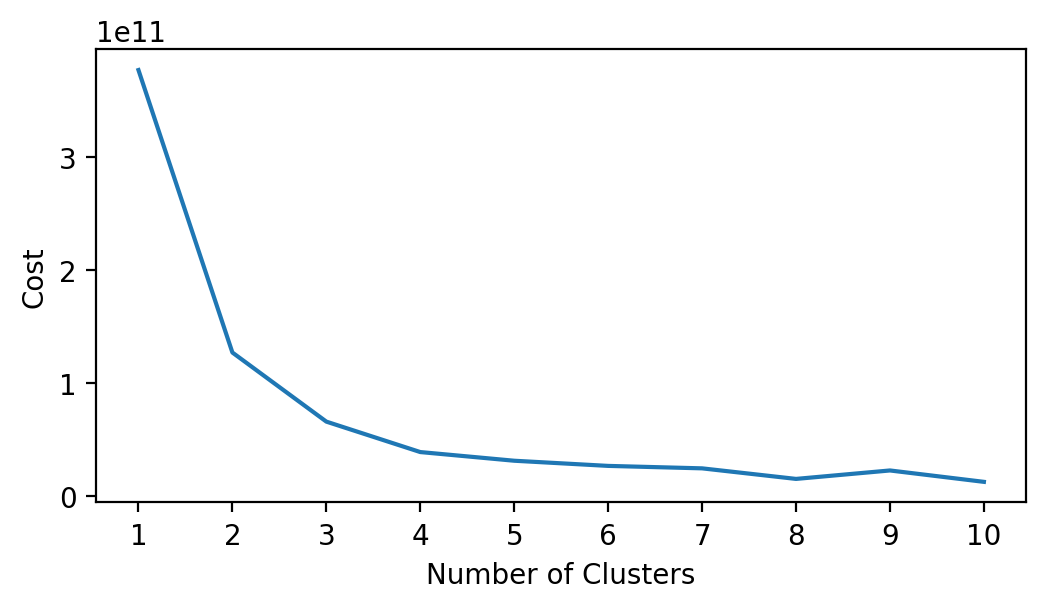

In [55]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), costs4)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [56]:
cluster_data4['cluster1'] = clusters_assigned4[0]
cluster_data4['cluster2'] = clusters_assigned4[1]
cluster_data4['cluster3'] = clusters_assigned4[2]
cluster_data4['cluster4'] = clusters_assigned4[3]
cluster_data4['cluster5'] = clusters_assigned4[4]
cluster_data4['cluster6'] = clusters_assigned4[5]
cluster_data4['cluster7'] = clusters_assigned4[6]
cluster_data4['cluster8'] = clusters_assigned4[7]
cluster_data4['cluster9'] = clusters_assigned4[8]
cluster_data4['cluster10'] = clusters_assigned4[9]
cluster_data4

,customer_ind,price,is_good_stay,occupant_type,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
1,1,1590.0,0,Family,0,0,1,0,1,0,0,0,8,2
3,3,977.0,0,Solo traveler,0,0,1,0,1,0,6,0,5,3
4,4,1590.0,0,Family,0,0,1,0,1,0,0,0,8,2
5,5,2308.0,0,Family,0,0,1,0,0,4,0,7,6,9
7,7,2308.0,0,Family,0,0,1,0,0,4,0,7,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76495,76495,2505.0,0,Couple,0,0,1,2,0,4,2,7,6,8
76510,76510,2912.0,1,Family,0,0,1,2,0,1,2,7,3,5
76511,76511,2651.0,1,Family,0,0,1,2,0,1,2,7,3,8
76515,76515,2651.0,1,Group,0,0,1,2,0,1,2,7,3,8


In [60]:
# Inspect the characteristics of chosen cluster
cluster_data_group4 = cluster_data4.filter(['price','is_good_stay','occupant_type','cluster4'])
cluster_data_group4 = cluster_data_group4.groupby('cluster4').agg(pd.Series.mode)
cluster_data_group4

,price,is_good_stay,occupant_type
cluster4,,,
0,1887.0,1,Solo traveler
1,10800.0,1,Family
2,3055.0,1,Couple
3,6000.0,1,Family


In [57]:
cluster_data4_pivot = cluster_data4.pivot_table(values='price',index='cluster4', columns=['occupant_type'],
                          aggfunc='count')
cluster_data4_pivot

occupant_type,Couple,Family,Group,Solo traveler
cluster4,,,,
0,11412,6293,3575,12042
1,544,661,242,351
2,5872,4724,2091,4577
3,1786,1900,670,1111


[Text(0.5, 1.0, 'distribution of price by cluster')]

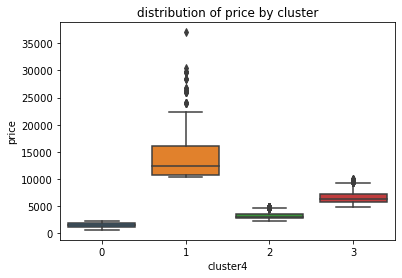

In [58]:
ax = sns.boxplot(data = cluster_data4, x = 'cluster4', y = 'price')
ax.set(title = 'distribution of price by cluster')

In [61]:
# Inspect the characteristics of chosen cluster
cluster_data_group4 = cluster_data4.filter(['price','is_good_stay','occupant_type','cluster5'])
cluster_data_group4 = cluster_data_group4.groupby('cluster5').agg(pd.Series.mode)
cluster_data_group4

,price,is_good_stay,occupant_type
cluster5,,,
0,3055.0,1,Couple
1,1887.0,1,Solo traveler
2,6000.0,1,Couple
3,7200.0,1,Family
4,10800.0,1,Family


[Text(0.5, 1.0, 'distribution of price by cluster')]

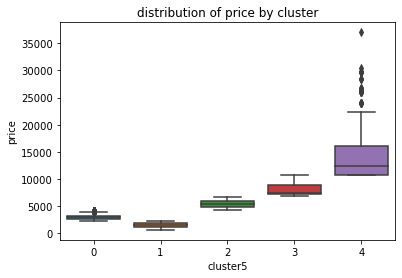

In [62]:
ax = sns.boxplot(data = cluster_data4, x = 'cluster5', y = 'price')
ax.set(title = 'distribution of price by cluster')

In [64]:
cluster_data4_pivot = cluster_data4.pivot_table(values='price',index='cluster5', columns=['occupant_type'],
                          aggfunc='count')
cluster_data4_pivot

occupant_type,Couple,Family,Group,Solo traveler
cluster5,,,,
0,5757,4578,2048,4577
1,11092,6022,3477,11742
2,1545,1461,560,1007
3,680,858,254,407
4,540,659,239,348


In [65]:
cluster_data4_pivot = cluster_data4.pivot_table(values='price',index='cluster5', columns=['is_good_stay'],
                          aggfunc='count')
cluster_data4_pivot

is_good_stay,0,1
cluster5,,
0,4747,12213
1,12185,20148
2,1194,3379
3,494,1705
4,273,1513


In [66]:
# Inspect the characteristics of chosen cluster
cluster_data_group4 = cluster_data4.filter(['price','is_good_stay','occupant_type','cluster6'])
cluster_data_group4 = cluster_data_group4.groupby('cluster6').agg(pd.Series.mode)
cluster_data_group4

,price,is_good_stay,occupant_type
cluster6,,,
0,1385.0,1,Solo traveler
1,3055.0,1,Couple
2,6000.0,1,Family
3,10800.0,1,Family
4,1887.0,1,Couple
5,7200.0,1,Family


In [123]:
club_king = ['Club Premier Executive Suite - King','Club Premier King Room','Club Room King','Club level, Guest room, 1 King, City view','Diamond Club King Room - Non-Smoking','Diamond Club Twin Room - Non-Smoking']
deluxe_king = ['Deluxe King Corner Room - Non-Smoking'
,'Deluxe King Room','Deluxe King Room - Smoking','Deluxe King Room Non-Smoking','Deluxe King Room with Pool View','Deluxe King Suite'
,'Deluxe Mountain View King','Deluxe Regency Non-Smoking',
'Horizon Deluxe King','King Deluxe Room','King Room','Dusit King Room']
grand_deluxe_king = ['King or Double Room with City View','Deluxe Guest room, 1 King','Fairmont Gold King Room - Non-Smoking','Fairmont King Room - Non-Smoking','Classic Grand Deluxe King','Deluxe High Street King',]
deluxe_queen = ['Deluxe Queen Room','Deluxe Queen Room with Two Queen Beds']
deluxe =['Deluxe Room''Deluxe Room (No Window)''Deluxe Single Room''Deluxe Studio']
deluxe_twin = ['Deluxe Double Room','Deluxe Double Studio','Deluxe Double or Twin Room','Deluxe Suite Twin','Deluxe Twin','Deluxe Twin Room'
,'Deluxe Twin Room Bay View','Deluxe Twin Room Non-Smoking','Deluxe Twin or Double Room']
double_room = ['Double Queen Room','Double Room','Double Room with Shared Bathroom','Double Room with Two Queen Beds','Double or Twin Room','Dusit Twin Room']
exe_double = ['Executive Deluxe Twin Room','Executive Double Room','Executive Double or Twin Room','Executive Suite Twin Room','Executive Twin Room']
exe_king=['Executive Deluxe King Suite with Lounge Access','Executive King Room','Executive King Suite','Executive Suite King'
,'Executive Suite with One King Bed and Bay View - Club Lounge Access','Business King Room']
exe_queen = ['Executive Deluxe Queen Room','Executive Queen Room']
family = ['Family Double Room','Family Room','Family Room (4 Adults)','Family Room with Balcony','Family Room with Private Bathroom']
grand_deluxe = ['Grand Deluxe','Grand Deluxe City View']
junior_king = ['Junior Family King Suite with City View or Bay View','Junior Suite King','Junior Suite, 1 Bedroom Suite, 1 King, City view']
obr_deluxe = ['One Bedroom Deluxe','One-Bedroom Deluxe']
obr_exe = ['One Bedroom Executive','One Bedroom Executive Suite']
obr_suite_double = ['One Bedroom Suite Double','One Bedroom Suite Double Room']
other_king = ['Guest Room, 1 King']
prem_double = ['Premier Double Room','Premier Double Room - Quarantine Only','Premier Twin Room','Premium Double or Twin Room']
prem_king = ['Larger Guest Room, 1 King, Outdoor Jetted Bathtub','Luxury Club King Room with City View','Premier King Bay View Suite'
,'Premier King Room','Premier King Room Non-Smoking Pool View','Premier King Room Nonsmoking','Premier Suite King','Premium Guest Room with king bed or two double beds'
,'Premium King Room','Sky Studio King']
prem_room = ['Premier Room','Premiere Single Room','Premium Room','Premium Room (No Window)','Premium guest room with balcony and lounge access']
prem_suite = ['Premier Suite','Premiere Suite']
quad = ['Quadruple Room','Quadruple Room with Private Bathroom','Quadruple Room with Shared Bathroom']
queen = ['Queen Room','Queen Room with Balcony']
single = ['Single Room','Single Room with Bathroom']
standard_doub = ['Standard Double Room','Standard Double Room No View','Standard Double Room with Sea View','Standard Double Room with Shared Bathroom'
,'Standard Double or Twin Room','Standard Double or Twin Room with Private Bathroom','Standard Double or Twin Room with Shared Bathroom'
,'Standard Twin Room','Standard Twin Room - High Floor','Standard Twin Room No View']
standard_king = ['Standard King Room - High Floor','Standard King or Twin Room']
standard_quad = ['Standard Quadruple','Standard Quadruple Room']
standard_room = ['Standard Room','Standard Room - Quarantine Only','Standard Room with Mobility Accessible Tub - Non-Smoking'
,'Standard Single Room','Standard Studio']
standard_triple = ['Standard Triple','Standard Triple Room']
studio = ['Studio','Studio Premier','Studio Twin','Studio with Balcony']
suite = ['Suite','Suite Family','Suite with Bay View','Suite with City View','Sun Star Suite','Sunrise Suite','Sunset Suite']
sup_double = ['Superior Double Room','Superior Double or Twin Room','Superior Loft Double Room','Superior Twin Room']
sup_king = ['Superior Atrium King Room','Superior King Room','Superior King Room with City View','Superior King Suite','Continental Superior King Room']
sup_room = ['Superior 1-Bedroom','Superior One Bedroom Suite','Superior Room','Superior Studio']
sup_triple = ['Superior Triple Room','Supreme Triple Room']
tbr_deluxe = ['Two Bedroom Deluxe','Two-Bedroom Deluxe']
tbr_suite = ['Two Bedroom Suite','Two-Bedroom Suite']
tbr_premier = ['Two Bedroom Premium Premier','Two-Bedroom Premier']

def get_room(room_type):
    if room_type in club_king:
        return "Club King"
    elif room_type in deluxe_king:
        return "Deluxe King"
    elif room_type in grand_deluxe_king:
        return "Grand Deluxe King"
    elif room_type in deluxe_queen:
        return "Deluxe Queen"
    elif room_type in deluxe:
        return "Deluxe Room"
    elif room_type in deluxe_twin:
        return "Deluxe Twin Room"
    elif room_type in double_room:
        return "Double Room"
    elif room_type in exe_double:
        return "Executive Double"
    elif room_type in exe_king:
        return "Executive King"
    elif room_type in exe_queen:
        return "Executive Queen"
    elif room_type in family:
        return "Family Room"
    elif room_type in grand_deluxe:
        return "Grand Deluxe"
    elif room_type in junior_king:
        return "Junior King"
    elif room_type in obr_deluxe:
        return "One Bedroom Deluxe"
    elif room_type in obr_exe:
        return "One Bedroom Executive"
    elif room_type in obr_suite_double:
        return "One Bedroom Suite Double"
    elif room_type in other_king:
        return "Other King"
    elif room_type in prem_double:
        return "Premier Double"
    elif room_type in prem_king:
        return "Premier King"
    elif room_type in prem_room:
        return "Premier Room"
    elif room_type in prem_suite:
        return "Premier Suite"
    elif room_type in quad:
        return "Quadruple Room"
    elif room_type in queen:
        return "Queen Room"
    elif room_type in single:
        return "Single Room"
    elif room_type in standard_doub:
        return "Standard Double"
    elif room_type in standard_king:
        return "Standard King"
    elif room_type in standard_quad:
        return "Standard Quadruple"
    elif room_type in standard_room:
        return "Standard Room"
    elif room_type in standard_triple:
        return "Standard Triple"
    elif room_type in studio:
        return "Studio"
    elif room_type in suite:
        return "Suite"
    elif room_type in sup_double:
        return "Superior Double"
    elif room_type in sup_king:
        return "Superior King"
    elif room_type in sup_room:
        return "Superior Room"
    elif room_type in sup_triple:
        return "Superior Triple"
    elif room_type in tbr_deluxe:
        return "Two Bedroom Deluxe"
    elif room_type in tbr_suite:
        return "Two Bedroom Suite"
    elif room_type in tbr_premier:
        return "Two Bedroom Premier"
    else:
        return room_type
    
data2.loc[:, 'room_class'] = data2['room_type'].apply(get_room)

C:\Users\colee\AppData\Local\Temp\ipykernel_24032\1873444004.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[:, 'room_class'] = data2['room_type'].apply(get_room)


In [124]:
data2.head()

,customer_ind,review_score,price,room_type,nights_stayed,occupant_type,from_country,nationality,room_class
1,1,7.0,1590.0,Triple Room,2,Family,Philippines,Philippines,Triple Room
3,3,6.0,977.0,Deluxe Room,6,Solo traveler,India,Foreigner,Deluxe Room
4,4,7.0,1590.0,Triple Room,1,Family,United Arab Emirates,Foreigner,Triple Room
5,5,7.0,2308.0,Family Room,5,Family,Philippines,Philippines,Family Room
7,7,7.0,2308.0,Family Room,2,Family,Philippines,Philippines,Family Room


In [125]:
cluster_data5 = data2.copy()

In [126]:
cluster_data5 = cluster_data5.filter(['customer_ind','price','room_class','occupant_type'])
cluster_data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_ind   57851 non-null  object 
 1   price          57851 non-null  float64
 2   room_class     57851 non-null  object 
 3   occupant_type  57851 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.2+ MB


In [127]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs5=[]
n_clusters5 = []
clusters_assigned5 = []

for i in tqdm(range(1,11)):
    try:
        kproto5 = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters5 = kproto5.fit_predict(cluster_data5, categorical=[0,2,3])
        costs5.append(kproto5.cost_)
        n_clusters5.append(i)
        clusters_assigned5.append(clusters5)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376820547885.10004
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376820547885.10004
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376820547885.10004
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376820547885.10004
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376820547885.10004
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376820547885.10004
Init: initializing centroids
Init: initializing clusters
Starting iterat

 10%|████████▎                                                                          | 1/10 [00:57<08:39, 57.76s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12149, ncost: 139142209380.03357
Run: 1, iteration: 2/100, moves: 2496, ncost: 128914095133.50804
Run: 1, iteration: 3/100, moves: 974, ncost: 127270516962.03072
Run: 1, iteration: 4/100, moves: 180, ncost: 127206187446.45166
Run: 1, iteration: 5/100, moves: 0, ncost: 127206187446.45166
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 15198, ncost: 164756706692.53348
Run: 2, iteration: 2/100, moves: 6178, ncost: 130231181866.47049
Run: 2, iteration: 3/100, moves: 1445, ncost: 127285833735.18866
Run: 2, iteration: 4/100, moves: 212, ncost: 127206187446.45166
Run: 2, iteration: 5/100, moves: 0, ncost: 127206187446.45166
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 309, nco

 20%|████████████████▍                                                                 | 2/10 [03:28<14:59, 112.48s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 22365, ncost: 82797200503.56169
Run: 1, iteration: 2/100, moves: 7844, ncost: 78278226427.67853
Run: 1, iteration: 3/100, moves: 1396, ncost: 78087037500.89853
Run: 1, iteration: 4/100, moves: 43, ncost: 78086861657.74123
Run: 1, iteration: 5/100, moves: 0, ncost: 78086861657.74123
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 12602, ncost: 90176857580.37787
Run: 2, iteration: 2/100, moves: 7046, ncost: 79044719545.8203
Run: 2, iteration: 3/100, moves: 2374, ncost: 78091721136.82797
Run: 2, iteration: 4/100, moves: 155, ncost: 78086861657.74123
Run: 2, iteration: 5/100, moves: 0, ncost: 78086861657.74123
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 5045, ncost: 892492

 30%|████████████████████████▌                                                         | 3/10 [06:28<16:43, 143.43s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7860, ncost: 71070831934.33441
Run: 1, iteration: 2/100, moves: 11133, ncost: 54403360480.633804
Run: 1, iteration: 3/100, moves: 9221, ncost: 45724808310.48979
Run: 1, iteration: 4/100, moves: 5253, ncost: 42030830040.545334
Run: 1, iteration: 5/100, moves: 3095, ncost: 39370846649.619514
Run: 1, iteration: 6/100, moves: 1393, ncost: 39241806432.902596
Run: 1, iteration: 7/100, moves: 184, ncost: 39239753124.96641
Run: 1, iteration: 8/100, moves: 19, ncost: 39239732723.846756
Run: 1, iteration: 9/100, moves: 0, ncost: 39239732723.846756
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 12059, ncost: 82092430644.39772
Run: 2, iteration: 2/100, moves: 6257, ncost: 70339330414.20227
Run: 2, iteration: 3/100, moves: 9401, ncost: 54292671169.

 40%|████████████████████████████████▊                                                 | 4/10 [11:44<21:08, 211.47s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10331, ncost: 44450103850.53147
Run: 1, iteration: 2/100, moves: 6628, ncost: 37045894497.06989
Run: 1, iteration: 3/100, moves: 2759, ncost: 34564961206.84444
Run: 1, iteration: 4/100, moves: 3026, ncost: 34326033368.817795
Run: 1, iteration: 5/100, moves: 1516, ncost: 34286211781.0177
Run: 1, iteration: 6/100, moves: 79, ncost: 34286097559.63708
Run: 1, iteration: 7/100, moves: 0, ncost: 34286097559.63708
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 11916, ncost: 91144460451.81468
Run: 2, iteration: 2/100, moves: 5266, ncost: 80361487933.32298
Run: 2, iteration: 3

 50%|█████████████████████████████████████████                                         | 5/10 [17:20<21:21, 256.31s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6275, ncost: 44147147847.12467
Run: 1, iteration: 2/100, moves: 6553, ncost: 33494974280.70394
Run: 1, iteration: 3/100, moves: 5853, ncost: 29906108324.818916
Run: 1, iteration: 4/100, moves: 5873, ncost: 27601968327.31524
Run: 1, iteration: 5/100, moves: 5684, ncost: 27025120212.952507
Run: 1, iteration: 6/100, moves: 751, ncost: 27012319925.798206
Run: 1, iteration: 7/100, moves: 68, ncost: 27012234917.79541
Run: 1, iteration: 8/100, moves: 2, ncost: 27012234846.905994
Run: 1, iteration: 9/100, moves: 0, ncost: 27012234846.905994
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializ

Run: 8, iteration: 11/100, moves: 3603, ncost: 32319262454.43218
Run: 8, iteration: 12/100, moves: 6082, ncost: 30917530295.915825
Run: 8, iteration: 13/100, moves: 4682, ncost: 30204922069.99979
Run: 8, iteration: 14/100, moves: 1467, ncost: 30116497581.407787
Run: 8, iteration: 15/100, moves: 2321, ncost: 29691700736.259594
Run: 8, iteration: 16/100, moves: 2164, ncost: 29172225737.941376
Run: 8, iteration: 17/100, moves: 2958, ncost: 27250382768.091854
Run: 8, iteration: 18/100, moves: 937, ncost: 27149109454.67499
Run: 8, iteration: 19/100, moves: 325, ncost: 27147180711.128242
Run: 8, iteration: 20/100, moves: 74, ncost: 27147071663.860565
Run: 8, iteration: 21/100, moves: 37, ncost: 27147048463.567097
Run: 8, iteration: 22/100, moves: 0, ncost: 27147048463.567097
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 11839, ncost: 33055387289.73424
Run: 9, iteration: 2/100, moves: 3890, ncost: 28988108581.343956
Run: 9, it

 60%|█████████████████████████████████████████████████▏                                | 6/10 [26:36<23:53, 358.30s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 32148, ncost: 33911866240.83828
Run: 1, iteration: 2/100, moves: 7067, ncost: 25353926703.462566
Run: 1, iteration: 3/100, moves: 1785, ncost: 24849178414.51059
Run: 1, iteration: 4/100, moves: 189, ncost: 24843372399.24431
Run: 1, iteration: 5/100, moves: 0, ncost: 24843372399.24431
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 8447, ncost: 34067350536.32535
Run: 2, iteration: 2/100, moves: 5120, ncost: 29233426499.997425
Run: 2, iteration: 3/100, moves: 2989, ncost: 28596870298.256348
Run: 2, iteration: 4/100, moves: 2988, ncost: 27922167480.007298
Run: 2, iteratio

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [33:11<18:30, 370.22s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13773, ncost: 39123646579.80421
Run: 1, iteration: 2/100, moves: 7968, ncost: 29800590070.505543
Run: 1, iteration: 3/100, moves: 2866, ncost: 26693870141.240467
Run: 1, iteration: 4/100, moves: 2454, ncost: 24071201063.470764
Run: 1, iteration: 5/100, moves: 740, ncost: 23925554693.07967
Run: 1, iteration: 6/100, moves: 71, ncost: 23924141358.583588
Run: 1, iteration: 7/100, moves: 75, ncost: 23918497838.17876
Run: 1, iteration: 8/100, moves: 0, ncost: 23918497838.17876
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 14779, ncost: 52827537174.36669
Run: 2, iteration: 2/100, moves: 11829, ncost: 35514097366.59844
Run: 2, ite

Run: 10, iteration: 8/100, moves: 1930, ncost: 24904660062.318653
Run: 10, iteration: 9/100, moves: 2595, ncost: 24779437988.692894
Run: 10, iteration: 10/100, moves: 1850, ncost: 24712719988.51642
Run: 10, iteration: 11/100, moves: 689, ncost: 24702805942.889107
Run: 10, iteration: 12/100, moves: 113, ncost: 24702476197.491417
Run: 10, iteration: 13/100, moves: 11, ncost: 24702472708.350983
Run: 10, iteration: 14/100, moves: 0, ncost: 24702472708.350983
Best run was number 4


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [40:53<13:19, 399.59s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9973, ncost: 26894017962.256046
Run: 1, iteration: 2/100, moves: 7084, ncost: 23503661055.171253
Run: 1, iteration: 3/100, moves: 3418, ncost: 23295090600.890022
Run: 1, iteration: 4/100, moves: 2484, ncost: 23206749460.834774
Run: 1, iteration: 5/100, moves: 3227, ncost: 23070893574.104534
Run: 1, iteration: 6/100, moves: 2831, ncost: 22981859905.403885
Run: 1, iteration: 7/100, moves: 724, ncost: 22977313473.093693
Run: 1, iteration: 8/100, moves: 115, ncost: 22977168758.58032
Run: 1, iteration: 9/100, moves: 1, ncost: 22977168742.555492
Run: 1, iteration: 10/100, moves: 0, ncost: 22977168742.555492
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

Run: 9, iteration: 5/100, moves: 589, ncost: 23020497804.52919
Run: 9, iteration: 6/100, moves: 193, ncost: 23019084529.63081
Run: 9, iteration: 7/100, moves: 27, ncost: 23019056383.952374
Run: 9, iteration: 8/100, moves: 0, ncost: 23019056383.952374
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 8788, ncost: 35235936530.967224
Run: 10, iteration: 2/100, moves: 6124, ncost: 31617366990.806797
Run: 10, iteration: 3/100, moves: 8573, ncost: 28830380343.181293
Run: 10, iteration: 4/100, moves: 6827, ncost: 28158499820.21831
Run: 10, iteration: 5/100, moves: 5415, ncost: 27460559610.99695
Run: 10, iteration: 6/100, moves: 7598, ncost: 25379890398.308857
Run: 10, iteration: 7/100, moves: 5233, ncost: 24974903532.953884
Run: 10, iteration: 8/100, moves: 3468, ncost: 24820404244.408947
Run: 10, iteration: 9/100, mo

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [49:28<07:15, 435.61s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 16801, ncost: 23631026864.295563
Run: 1, iteration: 2/100, moves: 5458, ncost: 23080310441.785683
Run: 1, iteration: 3/100, moves: 3441, ncost: 22752660481.23322
Run: 1, iteration: 4/100, moves: 1308, ncost: 22580929061.361458
Run: 1, iteration: 5/100, moves: 65, ncost: 22580209385.827805
Run: 1, iteration: 6/100, moves: 0, ncost: 22580209385.827805
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 10493, ncost: 24982859523.171066
Run: 2, iteration: 2/100, moves: 5459, ncost: 22459433983.944748
Run: 2, iteration: 3

Run: 8, iteration: 1/100, moves: 13829, ncost: 31832492842.263096
Run: 8, iteration: 2/100, moves: 9824, ncost: 23878579022.403053
Run: 8, iteration: 3/100, moves: 4798, ncost: 23494325844.52355
Run: 8, iteration: 4/100, moves: 1640, ncost: 23464728809.577778
Run: 8, iteration: 5/100, moves: 847, ncost: 23446516942.299843
Run: 8, iteration: 6/100, moves: 868, ncost: 23437571281.843433
Run: 8, iteration: 7/100, moves: 12, ncost: 23437569070.72545
Run: 8, iteration: 8/100, moves: 0, ncost: 23437569070.72545
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 9363, ncost: 32413356110.441635
Run: 9, iteration: 2/100, moves: 6344, ncost: 26656814657.071156
Run: 9, iteration: 3/100, moves: 4738, ncost: 23755725945.73892
Run: 9, iteration: 4/100, moves: 2389, ncost

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [58:33<00:00, 351.33s/it]


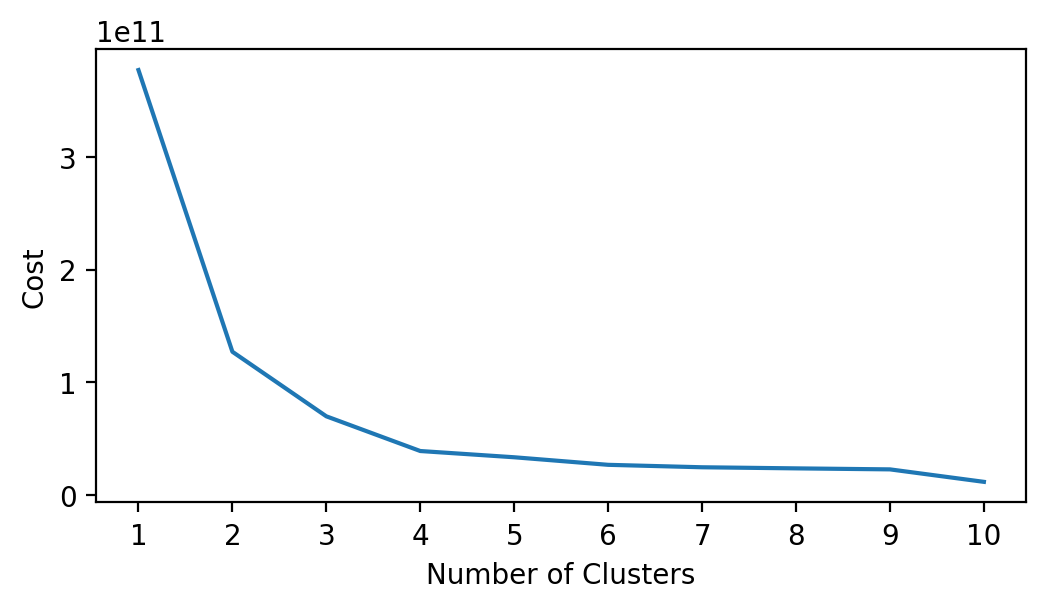

In [128]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), costs5)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [129]:
cluster_data5['cluster1'] = clusters_assigned5[0]
cluster_data5['cluster2'] = clusters_assigned5[1]
cluster_data5['cluster3'] = clusters_assigned5[2]
cluster_data5['cluster4'] = clusters_assigned5[3]
cluster_data5['cluster5'] = clusters_assigned5[4]
cluster_data5['cluster6'] = clusters_assigned5[5]
cluster_data5['cluster7'] = clusters_assigned5[6]
cluster_data5['cluster8'] = clusters_assigned5[7]
cluster_data5['cluster9'] = clusters_assigned5[8]
cluster_data5['cluster10'] = clusters_assigned5[9]
cluster_data5

,customer_ind,price,room_class,occupant_type,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
1,1,1590.0,Triple Room,Family,0,1,1,2,3,3,1,2,5,4
3,3,977.0,Deluxe Room,Solo traveler,0,1,1,2,3,3,4,3,2,3
4,4,1590.0,Triple Room,Family,0,1,1,2,3,3,1,2,5,4
5,5,2308.0,Family Room,Family,0,1,1,2,2,0,1,2,1,4
7,7,2308.0,Family Room,Family,0,1,1,2,2,0,1,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76495,76495,2505.0,Superior Double,Couple,0,1,1,0,2,0,5,6,1,7
76510,76510,2912.0,Deluxe Twin Room,Family,0,1,1,0,2,1,5,6,6,7
76511,76511,2651.0,Deluxe Twin Room,Family,0,1,1,0,2,1,5,6,6,7
76515,76515,2651.0,Deluxe Twin Room,Group,0,1,1,0,2,1,5,6,6,7


In [130]:
# Inspect the characteristics of chosen cluster
cluster_data_group5 = cluster_data5.filter(['price','room_class','occupant_type','cluster4'])
cluster_data_group5 = cluster_data_group5.groupby('cluster4').agg(pd.Series.mode)
cluster_data_group5

,price,room_class,occupant_type
cluster4,,,
0,3055.0,Double Room,Couple
1,10800.0,Grand Deluxe King,Family
2,1887.0,Standard Double,Solo traveler
3,6000.0,Deluxe King,Family


[Text(0.5, 1.0, 'distribution of price by cluster')]

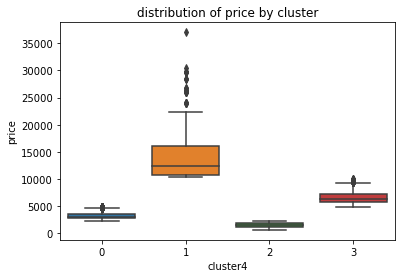

In [131]:
ax = sns.boxplot(data = cluster_data5, x = 'cluster4', y = 'price')
ax.set(title = 'distribution of price by cluster')

In [132]:
# Inspect the characteristics of chosen cluster
cluster_data_group5 = cluster_data5.filter(['price','room_class','occupant_type','cluster5'])
cluster_data_group5 = cluster_data_group5.groupby('cluster5').agg(pd.Series.mode)
cluster_data_group5

,price,room_class,occupant_type
cluster5,,,
0,10800.0,Grand Deluxe King,Family
1,6000.0,Deluxe King,Family
2,3055.0,Double Room,Couple
3,1887.0,Standard Double,Solo traveler
4,3532.0,Deluxe Twin Room,Couple


In [134]:
cluster_data5_pivot = cluster_data5.pivot_table(values='price',index='cluster5', columns=['occupant_type'],
                          aggfunc='count')
cluster_data5_pivot

occupant_type,Couple,Family,Group,Solo traveler
cluster5,,,,
0,544,661,242,351
1,1479,1495,510,917
2,5774,4162,2028,4700
3,9899,5346,3103,10725
4,1918,1914,695,1388


[Text(0.5, 1.0, 'Distribution of price by cluster')]

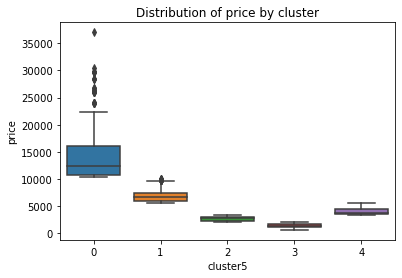

In [133]:
ax = sns.boxplot(data = cluster_data5, x = 'cluster5', y = 'price')
ax.set(title = 'Distribution of price by cluster')

In [144]:
cluster_data5[cluster_data5['cluster5']==4]['price'].max()

5504.0

In [105]:
# Inspect the characteristics of chosen cluster
cluster_data_group5 = cluster_data5.filter(['price','room_class','occupant_type','cluster6'])
cluster_data_group5 = cluster_data_group5.groupby('cluster6').agg(pd.Series.mode)
cluster_data_group5

,price,room_class,occupant_type
cluster6,,,
0,3055.0,Double Room,Couple
1,6000.0,Deluxe King,Family
2,7200.0,Superior King,Family
3,10800.0,Deluxe King,Family
4,1385.0,Standard Double,Solo traveler
5,1887.0,Standard Double,Couple


In [111]:
a = data2[['room_class','room_type','price']]
a = a[a['room_class']=="Deluxe King"]

In [112]:
a.to_csv("Deluxe_King.csv")

# Cluster EDA

In [147]:
clust = cluster_data5.filter(['cluster5','customer_ind'])
clust

,cluster5,customer_ind
1,3,1
3,3,3
4,3,4
5,2,5
7,2,7
...,...,...
76495,2,76495
76510,2,76510
76511,2,76511
76515,2,76515


In [234]:
## load scraped hotel reviews data
test2 = pickle.load(open("../data/merged_hotel_data_withprice.pkl", "rb"))
test2 = test2.reset_index(drop = True)
faci = pickle.load(open('../data/facilities_wide.pkl', 'rb'))
data_faci = test2.merge(faci, on = 'hotel_name_', how = 'left')
print(data_faci.shape)
print(data_faci.columns)
data_faci.head()

(76536, 86)
Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict', 'hotel_surroundings',
       'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x',
       'price_list', 'cheapest_price', 'facilities_groups', 'all_facilities_x',
       'link', 'room_price_dict', 'name', 'room_type', 'nights_stayed',
       'month_stayed', 'occupant_type', 'from_country', 'review_score',
       'date_reviewed', 'short_review', 'positive_review', 'negative_review',
       'price', 'all_facilities_y', 'unlist', 'facilities_count',
       'in_top_facilities', 'air conditioning', 'non-smoking rooms',
       'fire extinguishers', 'cctv in common areas', 'private bathroom',
       'smoke alarms', 'toilet', 'tv', '24-hour security', 'towels',
       'free toiletries', '24-hour front desk', 'shower', 'toilet paper',
       'airport shuttle', 'elevator', 'linens', 'secu

,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,hairdryer,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0


In [235]:
#insert customer #

customer_ind = range(0,len(data)) 
data_faci['customer_ind'] = customer_ind

In [236]:
df2 = data_faci.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hotel_name_                          57851 non-null  object 
 1   stars                                57851 non-null  int64  
 2   location                             57851 non-null  object 
 3   review_rating                        57851 non-null  object 
 4   description                          57851 non-null  object 
 5   main_facilities                      57851 non-null  object 
 6   total_reviews                        57851 non-null  object 
 7   sub_ratings                          57851 non-null  object 
 8   sub_ratings_categories               57851 non-null  object 
 9   sub_ratings_dict                     57851 non-null  object 
 10  hotel_surroundings                   57851 non-null  object 
 11  hotel_surroundings_distance 

In [237]:
merged_data = df2.merge(clust, on = 'customer_ind', how = 'left')
print(merged_data.shape)
print(merged_data.columns)
merged_data.head()

(57851, 88)
Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict', 'hotel_surroundings',
       'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x',
       'price_list', 'cheapest_price', 'facilities_groups', 'all_facilities_x',
       'link', 'room_price_dict', 'name', 'room_type', 'nights_stayed',
       'month_stayed', 'occupant_type', 'from_country', 'review_score',
       'date_reviewed', 'short_review', 'positive_review', 'negative_review',
       'price', 'all_facilities_y', 'unlist', 'facilities_count',
       'in_top_facilities', 'air conditioning', 'non-smoking rooms',
       'fire extinguishers', 'cctv in common areas', 'private bathroom',
       'smoke alarms', 'toilet', 'tv', '24-hour security', 'towels',
       'free toiletries', '24-hour front desk', 'shower', 'toilet paper',
       'airport shuttle', 'elevator', 'linens', 'secu

,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service,customer_ind,cluster5
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,0,1,3
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,0,3,3
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,0,4,3
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,0,5,2
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1,0,0,0,0,0,0,0,7,2


In [238]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 0 to 57850
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hotel_name_                          57851 non-null  object 
 1   stars                                57851 non-null  int64  
 2   location                             57851 non-null  object 
 3   review_rating                        57851 non-null  object 
 4   description                          57851 non-null  object 
 5   main_facilities                      57851 non-null  object 
 6   total_reviews                        57851 non-null  object 
 7   sub_ratings                          57851 non-null  object 
 8   sub_ratings_categories               57851 non-null  object 
 9   sub_ratings_dict                     57851 non-null  object 
 10  hotel_surroundings                   57851 non-null  object 
 11  hotel_surroundings_distance 

In [242]:
merged_data = merged_data.astype({"stars":"object", "cluster5":"object"})

In [243]:
def cluster_label(cluster5):
    if cluster5 == 0:
        return "High-Budget Family"
    elif cluster5 == 1:
        return "Mid-Budget Family"
    elif cluster5 == 2:
        return "Low-Budget Couple"
    elif cluster5 == 3:
        return "Low-Budget Solo"
    elif cluster5 == 4:
        return "Mid-Budget Couple"
   
    
merged_data.loc[:, 'cluster_label'] = merged_data['cluster5'].apply(cluster_label)

# Hotel star

<AxesSubplot:title={'center':'Hotel Star Preference per Cluster'}, xlabel='count', ylabel='cluster'>

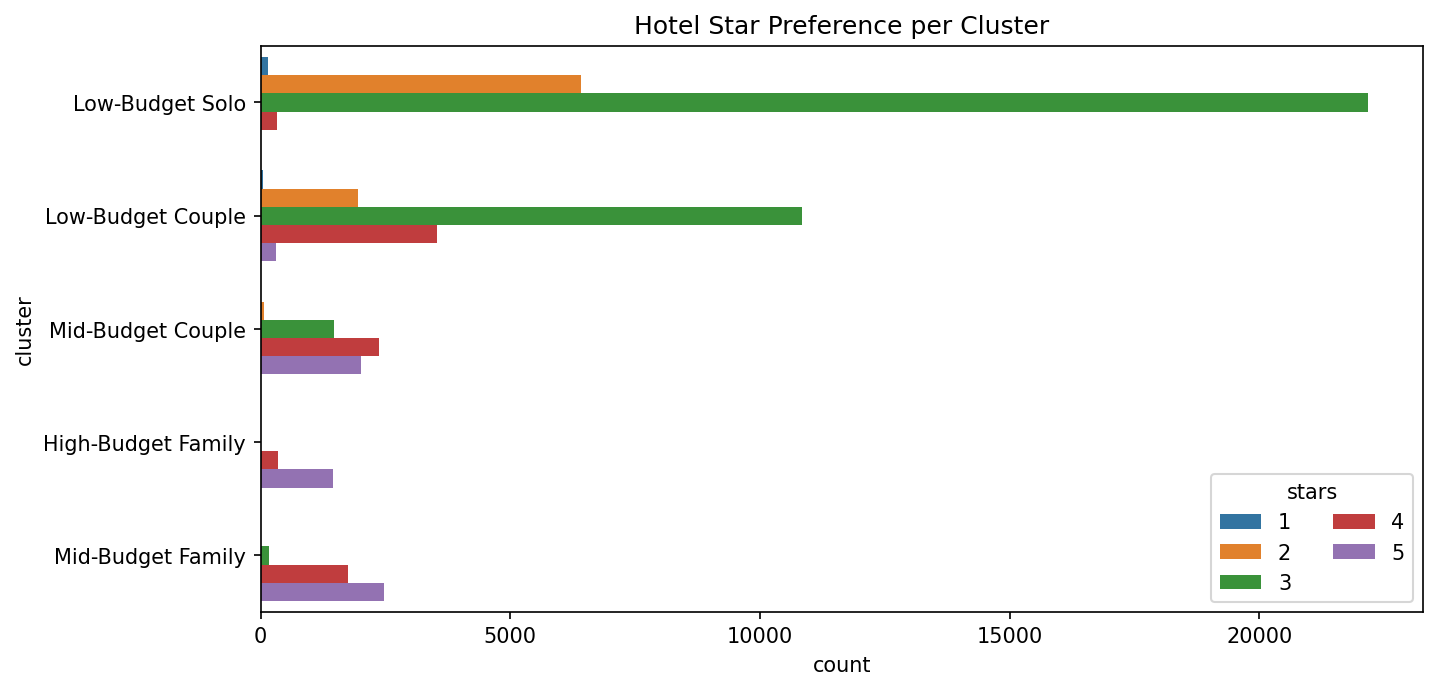

In [244]:
plt.figure(figsize=(10,5)  , dpi= 150)

ax = sns.countplot(data = merged_data, y = 'cluster_label', hue ='stars',dodge = True)

ax.set(title='Hotel Star Preference per Cluster', xlabel='count', ylabel = 'cluster')

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_width().round(0))
    x = p.get_x() + p.get_width() + 6
    y = p.get_y() + 0.14


sns.move_legend(ax, "lower right", ncol =2)
ax

In [245]:
merged_data = merged_data.astype({"review_score":"float"})

In [246]:
#create a column for good stay

def review_score_class(review_score):
    if review_score >= 7.5:
        return 1
    else:
        return 0
    
merged_data.loc[:, 'good_stay'] = merged_data['review_score'].apply(review_score_class)

In [247]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 0 to 57850
Data columns (total 90 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hotel_name_                          57851 non-null  object 
 1   stars                                57851 non-null  object 
 2   location                             57851 non-null  object 
 3   review_rating                        57851 non-null  object 
 4   description                          57851 non-null  object 
 5   main_facilities                      57851 non-null  object 
 6   total_reviews                        57851 non-null  object 
 7   sub_ratings                          57851 non-null  object 
 8   sub_ratings_categories               57851 non-null  object 
 9   sub_ratings_dict                     57851 non-null  object 
 10  hotel_surroundings                   57851 non-null  object 
 11  hotel_surroundings_distance 

# Good Stay

In [349]:
good_stay_df = merged_data.groupby(by = ['cluster_label','good_stay'])[['customer_ind']].count().sort_values(by=['cluster_label','good_stay'], ascending = False)
good_stay_df

customer_ind
cluster_label      good_stay              
Mid-Budget Family  1                  3342
                   0                  1059
Mid-Budget Couple  1                  4453
                   0                  1462
Low-Budget Solo    1                 17973
                   0                 11100
Low-Budget Couple  1                 11667
                   0                  4997
High-Budget Family 1                  1523
                   0                   275

# Facilities

In [248]:
faci_df = merged_data.filter(['hotel_name_',
'air conditioning',
'non-smoking rooms',
'fire extinguishers',
'cctv in common areas',
'private bathroom',
'smoke alarms',
'toilet',
'tv',
'24-hour security',
'towels',
'free toiletries',
'24-hour front desk',
'shower',
'toilet paper',
'airport shuttle',
'elevator',
'linens',
'security alarm',
'flat-screen tv',
'daily housekeeping',
'cctv outside property',
'room service',
'designated smoking area',
'safe',
'desk',
'bidet',
'smoke-free property',
'baggage storage',
'cable channels',
'telephone',
'restaurant',
'key card access',
'electric kettle',
'meeting/banquet facilities',
'laundry',
'fax/photocopying',
'upper floors accessible by elevator',
'family rooms',
'wake-up service',
'concierge',
'hairdryer',
'slippers',
'key access',
'accessible parking',
'facilities for disabled guests',
'wardrobe or closet',
'clothes rack',
'socket near the bed',
'bar',
'ironing service',
'customer_ind',
'good_stay',
'cluster_label',
])

# Preferred Facilities of those who had a good stay

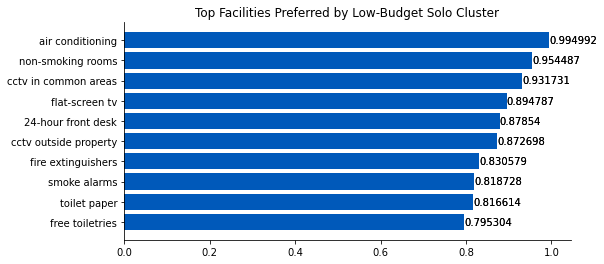

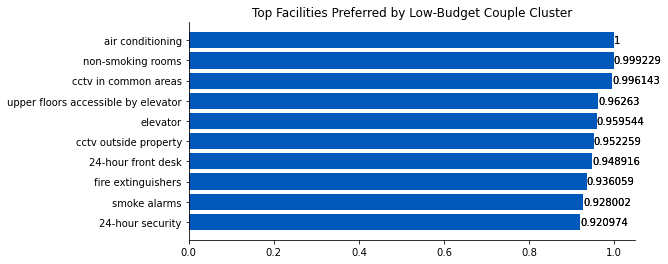

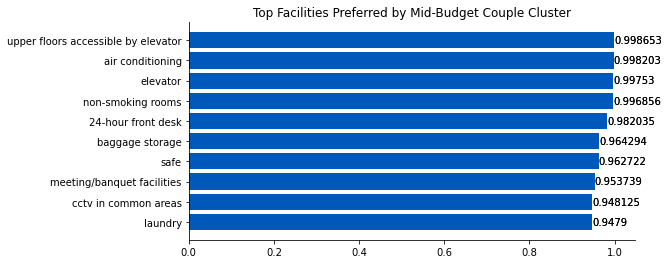

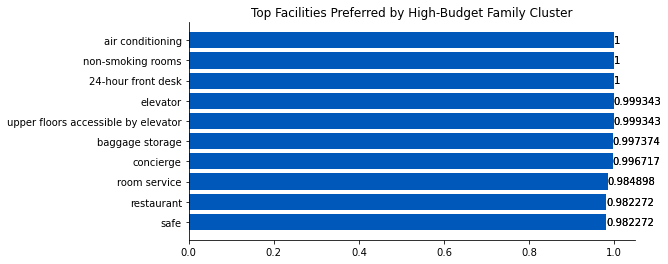

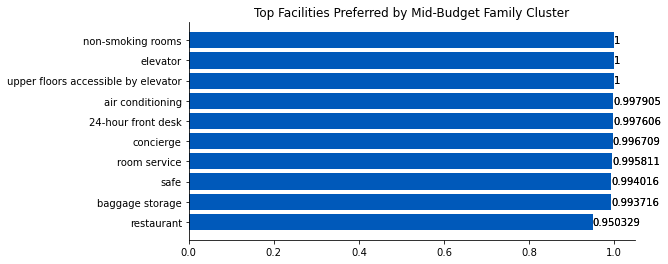

In [350]:

def fcl_cluster(cluster_label):
    colors = ['#bfdeff', '#80bcff', '#0059ba', '#00438c', '#003e82']
    dfs = faci_df[(faci_df['cluster_label'] == cluster_label) & (faci_df['good_stay'] == 1)]
    total_cols = dfs.shape[0]
    dfs = dfs.set_index('hotel_name_')
    to_drop = ['cluster_label', 'good_stay','customer_ind']
    total_cols = dfs.shape[0]
    dfs_trans = dfs.drop(to_drop, axis=1)
    dfs_trans = dfs_trans.T
    dfs_trans['freq_of_facilities'] = dfs_trans.sum(axis = 1)
    dfs_trans['\% of freq_of_facilities'] = dfs_trans['freq_of_facilities'] / total_cols
    dfs_trans.sort_values(by=['\% of freq_of_facilities'], inplace=True, ascending=True)
    
    

    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.barh(dfs_trans.index[-10:], dfs_trans['\% of freq_of_facilities'].iloc[-10:], color = '#0059ba')
    ax.set_title(f'Top Facilities Preferred by {cluster_label} Cluster')
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
        ax.bar_label(ax.containers[0])
    plt.show()
    
cluster = ['Low-Budget Solo','Low-Budget Couple','Mid-Budget Couple','High-Budget Family', 'Mid-Budget Family']
for i in cluster:
    fcl_cluster(i)

In [435]:
faci_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 0 to 57850
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   hotel_name_                          57851 non-null  object
 1   air conditioning                     57851 non-null  int64 
 2   non-smoking rooms                    57851 non-null  int64 
 3   fire extinguishers                   57851 non-null  int64 
 4   cctv in common areas                 57851 non-null  int64 
 5   private bathroom                     57851 non-null  int64 
 6   smoke alarms                         57851 non-null  int64 
 7   toilet                               57851 non-null  int64 
 8   tv                                   57851 non-null  int64 
 9   24-hour security                     57851 non-null  int64 
 10  towels                               57851 non-null  int64 
 11  free toiletries                      5785

# Top lacking facilities in a bad stay per cluster

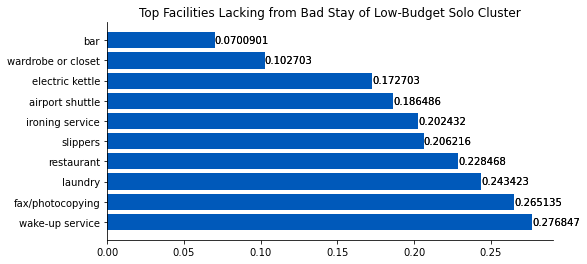

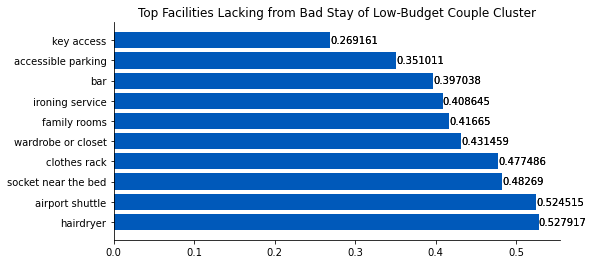

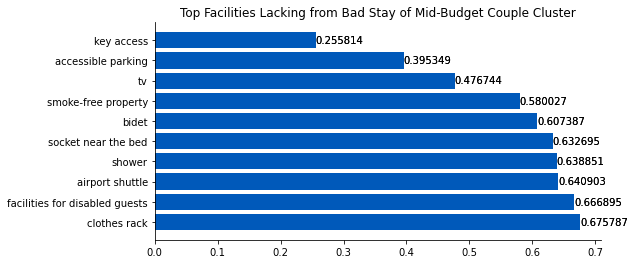

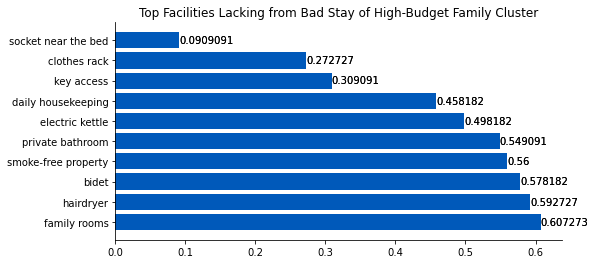

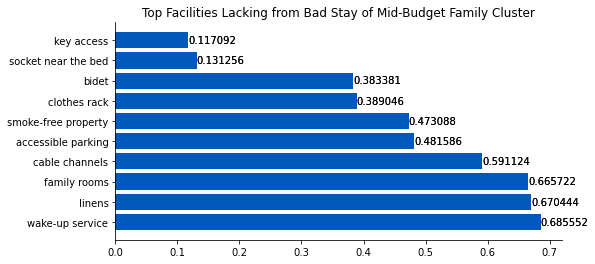

In [436]:
def lack_fcl(cluster_label):
    colors = ['#bfdeff', '#80bcff', '#0059ba', '#00438c', '#003e82']
    dfs = faci_df[(faci_df['cluster_label'] == cluster_label) & (faci_df['good_stay'] == 0)]
    total_cols = dfs.shape[0]
    dfs = dfs.set_index('hotel_name_')
    to_drop = ['cluster_label', 'good_stay','customer_ind']
    total_cols = dfs.shape[0]
    dfs_trans = dfs.drop(to_drop, axis=1)
    dfs_trans = dfs_trans.T
    dfs_trans['freq_of_facilities'] = dfs_trans.sum(axis = 1)
    dfs_trans['\% of freq_of_facilities'] = dfs_trans['freq_of_facilities'] / total_cols
    dfs_trans.sort_values(by=['\% of freq_of_facilities'], inplace=True, ascending=False)
    
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.barh(dfs_trans.index[-10:], dfs_trans['\% of freq_of_facilities'].iloc[-10:], color=colors[2])
    ax.set_title(f'Top Facilities Lacking from Bad Stay of {cluster_label} Cluster')
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
        ax.bar_label(ax.containers[0])
    plt.show()
    
cluster = ['Low-Budget Solo','Low-Budget Couple','Mid-Budget Couple','High-Budget Family', 'Mid-Budget Family']
for i in cluster:
    lack_fcl(i)

# Location

In [427]:
d = pd.DataFrame(samp_wide)
d['value']
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (cluster_label, )             5 non-null      object 
 1   (value, accessible parking)   5 non-null      float64
 2   (value, airport shuttle)      5 non-null      float64
 3   (value, bar)                  5 non-null      float64
 4   (value, bidet)                5 non-null      float64
 5   (value, clothes rack)         5 non-null      float64
 6   (value, daily housekeeping)   5 non-null      float64
 7   (value, electric kettle)      5 non-null      float64
 8   (value, family rooms)         5 non-null      float64
 9   (value, ironing service)      5 non-null      float64
 10  (value, key access)           5 non-null      float64
 11  (value, smoke-free property)  5 non-null      float64
 12  (value, socket near the bed)  5 non-null      float64
 13  (value, t

In [345]:
loc1 = pickle.load(open('../data/hotel_surroundings_link.pkl', 'rb'))
loc1.head()

,hotel_name_,nearest_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,url
0,RedDoorz near East Avenue Medical Center,15.0,0.10,12.0,12.0,0.90,21,3,https://www.booking.com/hotel/ph/reddoorz-near...
1,Skylab Guesthouse,12.0,0.20,11.0,6.0,0.95,21,2,https://www.booking.com/hotel/ph/skylab213b.ht...
2,The Excelsior Hotel Las Piñas,8.0,0.04,17.0,11.0,0.55,20,5,https://www.booking.com/hotel/ph/the-excelsior...
3,Rothman Hotel,8.0,0.10,0.9,0.3,0.25,19,10,https://www.booking.com/hotel/ph/rothman-manil...
4,OYO 772 Remedios Apartment,7.0,0.10,0.5,1.0,0.60,19,10,https://www.booking.com/hotel/ph/oyo-772-remed...


In [265]:
loc = pickle.load(open('../data/hotel_surroundings_features.pkl', 'rb'))
loc.head()
loc.shape

(307, 15)

In [272]:
loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name_        307 non-null    object 
 1   nearest_airport    307 non-null    float64
 2   ave_airport        307 non-null    float64
 3   nearest_resto      307 non-null    float64
 4   nearest_train      307 non-null    float64
 5   nearest_ocean      307 non-null    float64
 6   nearest_other      307 non-null    float64
 7   number_close       307 non-null    int64  
 8   nearest_other_2km  307 non-null    int64  
 9   url                307 non-null    object 
 10  location           307 non-null    object 
 11  zip_code           307 non-null    int64  
 12  city               307 non-null    object 
 13  latitude           307 non-null    float64
 14  longitude          307 non-null    float64
dtypes: float64(8), int64(3), object(4)
memory usage: 38.4+ KB


In [268]:
merged_data_withloc = merged_data.merge(loc, on = 'hotel_name_', how = 'left')
print(merged_data_withloc.shape)
print(merged_data_withloc.columns)
merged_data_withloc.head()

(57851, 104)
Index(['hotel_name_', 'stars', 'location_x', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict',
       ...
       'nearest_ocean', 'nearest_other', 'number_close', 'nearest_other_2km',
       'url', 'location_y', 'zip_code', 'city', 'latitude', 'longitude'],
      dtype='object', length=104)


,hotel_name_,stars,location_x,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,nearest_ocean,nearest_other,number_close,nearest_other_2km,url,location_y,zip_code,city,latitude,longitude
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,12.0,0.9,21,3,https://www.booking.com/hotel/ph/reddoorz-near...,"90 Matatag Street, Quezon City, 1100 Manila, P...",1100,Quezon City,14.650991,121.048615
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,12.0,0.9,21,3,https://www.booking.com/hotel/ph/reddoorz-near...,"90 Matatag Street, Quezon City, 1100 Manila, P...",1100,Quezon City,14.650991,121.048615
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,12.0,0.9,21,3,https://www.booking.com/hotel/ph/reddoorz-near...,"90 Matatag Street, Quezon City, 1100 Manila, P...",1100,Quezon City,14.650991,121.048615
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,12.0,0.9,21,3,https://www.booking.com/hotel/ph/reddoorz-near...,"90 Matatag Street, Quezon City, 1100 Manila, P...",1100,Quezon City,14.650991,121.048615
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,12.0,0.9,21,3,https://www.booking.com/hotel/ph/reddoorz-near...,"90 Matatag Street, Quezon City, 1100 Manila, P...",1100,Quezon City,14.650991,121.048615


In [271]:
merged_data_withloc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 0 to 57850
Columns: 104 entries, hotel_name_ to longitude
dtypes: float64(11), int64(55), object(38)
memory usage: 46.3+ MB


In [273]:
loc_df = merged_data_withloc.filter(['hotel_name_',
'nearest_airport',
'ave_airport',
'nearest_resto',
'nearest_train',
'nearest_ocean',
'nearest_other',
'number_close',
'nearest_other_2km',
'url',
'location',
'zip_code',
'city',
'latitude',
'longitude',
'good_stay',
'cluster_label',
])
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 0 to 57850
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name_        57851 non-null  object 
 1   nearest_airport    57851 non-null  float64
 2   ave_airport        57851 non-null  float64
 3   nearest_resto      57851 non-null  float64
 4   nearest_train      57851 non-null  float64
 5   nearest_ocean      57851 non-null  float64
 6   nearest_other      57851 non-null  float64
 7   number_close       57851 non-null  int64  
 8   nearest_other_2km  57851 non-null  int64  
 9   url                57851 non-null  object 
 10  zip_code           57851 non-null  int64  
 11  city               57851 non-null  object 
 12  latitude           57851 non-null  float64
 13  longitude          57851 non-null  float64
 14  good_stay          57851 non-null  int64  
 15  cluster_label      57851 non-null  object 
dtypes: float64(8), int64(4

# Preferred distance of customers who had a good stay

In [343]:

df_good = loc_df[loc_df['good_stay']==1] 
df_nearest_good = df_good.groupby(by = ['cluster_label'])[['nearest_train','nearest_resto','nearest_airport','nearest_ocean']].mean().round(decimals=1).reset_index()
df_nearest_good = df_nearest_good.rename(columns = {'nearest_train': 'train','nearest_resto': 'restaurant','nearest_airport':'airport','nearest_ocean': 'ocean'})
df_nearest_good

,cluster_label,train,restaurant,airport,ocean
0,High-Budget Family,5.9,0.1,22.1,11.9
1,Low-Budget Couple,7.7,0.1,17.8,12.7
2,Low-Budget Solo,6.8,0.2,12.1,9.8
3,Mid-Budget Couple,9.1,0.1,14.1,11.6
4,Mid-Budget Family,6.0,0.1,21.5,11.7


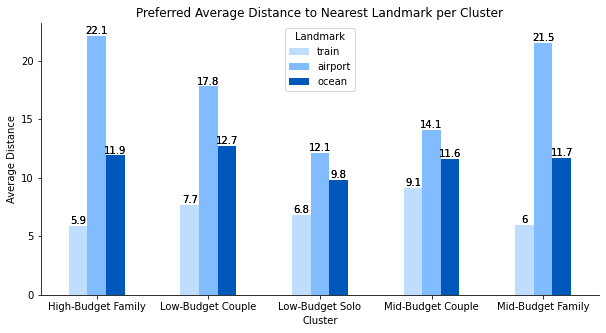

In [438]:
colors = ['#bfdeff', '#80bcff', '#0059ba', '#00438c']
ax = df_nearest_good.plot(x="cluster_label", y=['train', 'airport','ocean'], kind="bar",figsize=(10,5),color=colors)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.set_title('Preferred Average Distance to Nearest Landmark per Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Average Distance')
    ax.legend(title='Landmark')
props = {"rotation" : 0}
plt.setp(ax.get_xticklabels(), **props)
plt.show()



# distance of customers who had a bad stay


In [351]:
df_bad = loc_df[loc_df['good_stay']==0] 
df_nearest_bad = df_bad.groupby(by = ['cluster_label'])[['nearest_train','nearest_resto','nearest_airport','nearest_ocean']].mean().round(decimals=1).reset_index()
df_nearest_bad = df_nearest_bad.rename(columns = {'nearest_train': 'train','nearest_resto': 'restaurant','nearest_airport':'airport','nearest_ocean': 'ocean'})
df_nearest_bad

,cluster_label,train,restaurant,airport,ocean
0,High-Budget Family,6.6,0.1,18.2,11.9
1,Low-Budget Couple,7.3,0.1,14.9,11.3
2,Low-Budget Solo,6.4,0.2,12.7,9.2
3,Mid-Budget Couple,7.7,0.1,15.8,11.7
4,Mid-Budget Family,5.7,0.1,22.4,9.9


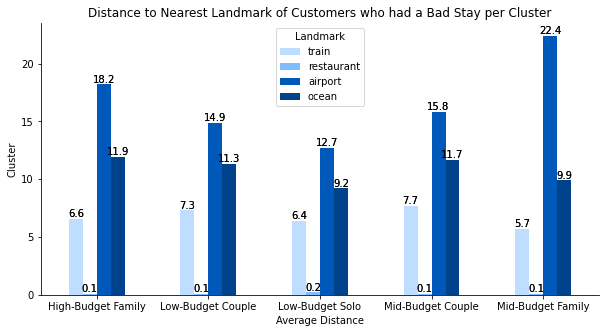

In [352]:
colors = ['#bfdeff', '#80bcff', '#0059ba', '#00438c']
ax = df_nearest_bad.plot(x="cluster_label", y=['train', 'restaurant', 'airport','ocean'], kind="bar",figsize=(10,5),color=colors)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.bar_label(ax.containers[3])
    ax.set_title('Distance to Nearest Landmark of Customers who had a Bad Stay per Cluster')
    ax.set_xlabel('Average Distance')
    ax.set_ylabel('Cluster')
    ax.legend(title='Landmark')
props = {"rotation" : 0}
plt.setp(ax.get_xticklabels(), **props)
plt.show()

